In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import os
from datetime import datetime
from phik.report import plot_correlation_matrix
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from featurewiz import featurewiz
from optbinning import BinningProcess
from sklearn.metrics import classification_report
import openpyxl
from pycaret.classification import *
import re
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, precision_score, recall_score, roc_curve, auc
import pickle
import jenkspy
from openpyxl.drawing.image import Image
from openpyxl import load_workbook

import itertools
import os

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set()

In [3]:
file_path = "Input_Sviluppo_Prestitempo_custom_con_più_colonne.parquet"
df = pd.read_parquet(file_path)

In [4]:
df_clienti = df.copy()

In [5]:
df_clienti

,Chiave,PRATICA,DELIN_HISTORY,MOD_PAGAM,MOD_PAG,TIPO_GARANTE,Denominazione Regione,CODICE_PHONIA,DES_PRODOTTO,DES_BENE,DATA_AFFIDO,DATA_FINE_AFFIDO,DATA_FINANZIAM,DT_VAL_ULT_PAGAM,DATA_ESTINZ,DATA_AGGIORNAMENTO,P_INST1_DUE_DATE,P_INST2_DUE_DATE,P_INST3_DUE_DATE,DT_VAL_RAT_IMP1,DT_VAL_RAT_IMP2,P_INST1_VAL_DATE,P_INST3_VAL_DATE,SCAD_MAXIRATA,SCAD_RAT_IMP2,SCAD_RAT_IMP1,IMP_FINANZIATO,IMP_MAXIRATA,CURRENT_BALANCE,P_INST1_AMOUNT_PAID,P_INST2_AMOUNT_PAID,P_INST3_AMOUNT_PAID,RATE_TOTALI,NUM_RATE_RIFI,NUM_RAT_IMP1,NUM_RAT_IMP2,P_INST1_NUM,P_INST2_NUM,P_INST3_NUM,NUMERO RATE,PROVINCIA,P_INST1_AMOUNT,P_INST2_AMOUNT,P_INST3_AMOUNT,IMP_RAT_IMP1,IMP_RAT_IMP2,IMP_PAG_RAT_IMP1,IMP_PAG_RAT_IMP2,TOT_RATE_AFF_INIZIO_MAND,TOT_MORA_AFF_INIZIO_MAND,TOT_ONERI_AFF_INIZIO_MAND,TOT_AFF_INIZIO_MAND,TOT_RATE_PAG,TOT_MORA_PAG,TOT_ONERI_PAG,TOT_PAG,TOT_RATE_AFF,TOT_MORA_AFF,TOT_ONERI_AFF,TOT_AFF,Flag_Riciclo_SDD,TOT REC,TOT AFF,Flag_Rifinanziamento,Flag_Garante,Flag_Cointestazione,Metodo_pagamento,Ratio_Rate_Imp1,Ratio_Rate_Imp2,DistanzaAffidoUltimoPagamento,Sesso,Eta_Debitore,NOSTART12M,NOSTART6M,DurataFinanziamento,Flag_Galleggiamento_3M,Flag_Galleggiamento_6M,Flag_Gestione_Prec,Flag_InsolvenzaGrave_3M,Flag_InsolvenzaGrave_6M,Flag_Miglioramento_3M,Flag_Rate_piu_uno,Flag_rientrototale_6M,Flag_Scivolamento_3M,Flag_Scivolamento_6M,Numero_mesi_rec,Severity_12M,Severity_12M_pesata,Flag_InsolvenzaGrave_12M,Target_95,FlagRecOver100,AgeingGestioneGg,AgeingErogazioneGg
0,00000854016301_08_2021,00000854016301,13221222111111143332432332111100000000,P,BP,C,Lazio,ALPTEL,PRESTITO PERSONALE,None,2021-08-02,2021-09-05,2018-06-12,2021-07-05,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-06-16,2021-07-05,None,2021-08-12,2021-07-12,"15,200.00",0.00,"9,770.58",0000000023700,0000000023700,0000000023700,84.00,0.00,37.00,38.00,34.00,35.00,36.00,2,LT,237.00,237.00,237.00,237.00,237.00,0.00,0.00,237.00,28.24,12.00,277.24,0.00,0.00,0.00,0.00,237.00,28.24,12.00,277.24,None,0.00,486.00,NO,SI,SI,BP,0.44,0.45,-1.00,None,NaN,NO,NO,7.00,NO,NO,NO,SI,SI,NO,SI,NO,NO,NO,12.00,1.58,0.95,SI,0,0,21.00,"1,126.00"
1,00006003826200_08_2021,00006003826200,1001000000000000000000000000000000001100100110...,P,BP,None,Liguria,ALPTEL,REPEAT BUSINESS,FIDELIZ.OTTIMI,2021-08-10,2021-09-05,2016-05-12,2021-06-09,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-16,2021-06-09,None,2021-08-12,2021-07-12,"14,234.40",0.00,"8,636.46",0000000018350,0000000018350,0000000018350,120.00,0.00,62.00,63.00,59.00,60.00,61.00,2,IM,183.50,183.50,183.50,183.50,183.50,0.00,0.00,183.50,1.56,12.00,197.06,0.00,0.00,0.00,0.00,183.50,1.56,12.00,197.06,Y,0.00,379.00,NO,NO,NO,BP,0.52,0.53,-2.00,Donna,59.00,NO,NO,10.00,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,1.00,0.17,0.15,NO,0,0,29.00,"1,887.00"
2,00002286163301_08_2021,00002286163301,111010,P,BP,None,Calabria,ALPTEL,ELETTRONICA & ELETTRODOME,None,2021-08-10,2021-09-05,2021-02-10,2021-06-14,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-12,2021-06-14,None,2021-08-12,2021-07-12,"1,500.00",0.00,"1,329.19",0000000005650,0000000005650,0000000005650,30.00,0.00,5.00,6.00,2.00,3.00,4.00,2,KR,56.50,56.50,56.50,56.50,56.50,0.00,0.00,56.50,0.58,15.97,73.05,0.00,0.00,0.00,0.00,56.50,0.58,15.97,73.05,None,0.00,144.94,NO,NO,NO,BP,0.17,0.20,-2.00,Donna,57.00,SI,SI,2.50,SI,NO,SI,NO,NO,NO,NO,SI,NO,NO,3.00,0.67,0.57,NO,0,0,29.00,152.00
3,00001576642301_08_2021,00001576642301,10012101111101110000000,P,BP,None,Sicilia,ALPTEL,REPEAT BUSINESS,None,2021-08-10,2021-09-05,2019-09-12,2021-05-27,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-26,2021-05-27,None,2021-08-12,2021-07-12,"14,280.00",0.00,"10,954.69",0000000026000,0000000026000,0000000026000,72.00,0.00,22.00,23.00,19.00,20.00,21.00,2,EN,260.00,260.00,260.00,260.00,260.00,0.00,0.00,260.00,16.20,12.00,288.20,0.00,0.00,0.00,0.00,260.00,16.20,12.00,288.20,None,0.00,532.00,NO,NO,NO,BP,0.31,0.32,-2.00,Uomo,76.00,NO,NO,6.00,NO,NO,SI,NO,NO,NO,SI,SI,NO,NO,1.00,0.83,0.41,NO,0,0,29.00,669.00


<h6> Ricalcolo la colonna Target_95 perchè ha dei valori mancanti </h6>

In [6]:
df_clienti['Target_95'] = (df_clienti['TOT REC'] / df_clienti['TOT AFF'] >= 0.95).astype(int)

In [7]:
sorted(df_clienti.columns)

['AgeingErogazioneGg',
 'AgeingGestioneGg',
 'CODICE_PHONIA',
 'CURRENT_BALANCE',
 'Chiave',
 'DATA_AFFIDO',
 'DATA_AGGIORNAMENTO',
 'DATA_ESTINZ',
 'DATA_FINANZIAM',
 'DATA_FINE_AFFIDO',
 'DELIN_HISTORY',
 'DES_BENE',
 'DES_PRODOTTO',
 'DT_VAL_RAT_IMP1',
 'DT_VAL_RAT_IMP2',
 'DT_VAL_ULT_PAGAM',
 'Denominazione Regione',
 'DistanzaAffidoUltimoPagamento',
 'DurataFinanziamento',
 'Eta_Debitore',
 'FlagRecOver100',
 'Flag_Cointestazione',
 'Flag_Galleggiamento_3M',
 'Flag_Galleggiamento_6M',
 'Flag_Garante',
 'Flag_Gestione_Prec',
 'Flag_InsolvenzaGrave_12M',
 'Flag_InsolvenzaGrave_3M',
 'Flag_InsolvenzaGrave_6M',
 'Flag_Miglioramento_3M',
 'Flag_Rate_piu_uno',
 'Flag_Riciclo_SDD',
 'Flag_Rifinanziamento',
 'Flag_Scivolamento_3M',
 'Flag_Scivolamento_6M',
 'Flag_rientrototale_6M',
 'IMP_FINANZIATO',
 'IMP_MAXIRATA',
 'IMP_PAG_RAT_IMP1',
 'IMP_PAG_RAT_IMP2',
 'IMP_RAT_IMP1',
 'IMP_RAT_IMP2',
 'MOD_PAG',
 'MOD_PAGAM',
 'Metodo_pagamento',
 'NOSTART12M',
 'NOSTART6M',
 'NUMERO RATE',
 'NUM_

In [8]:
df_clienti['Target_95'].isna().sum()

0

In [9]:
df_clienti.shape

(148463, 93)

In [10]:
# Definiamo funzione per spostare le colonne all'inizio del dataset
def move_column_inplace(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)

In [11]:
# Spostiamo il Target_95 sulla prima colonna
move_column_inplace(df_clienti,'Target_95',0)

In [12]:
df_clienti

,Target_95,Chiave,PRATICA,DELIN_HISTORY,MOD_PAGAM,MOD_PAG,TIPO_GARANTE,Denominazione Regione,CODICE_PHONIA,DES_PRODOTTO,DES_BENE,DATA_AFFIDO,DATA_FINE_AFFIDO,DATA_FINANZIAM,DT_VAL_ULT_PAGAM,DATA_ESTINZ,DATA_AGGIORNAMENTO,P_INST1_DUE_DATE,P_INST2_DUE_DATE,P_INST3_DUE_DATE,DT_VAL_RAT_IMP1,DT_VAL_RAT_IMP2,P_INST1_VAL_DATE,P_INST3_VAL_DATE,SCAD_MAXIRATA,SCAD_RAT_IMP2,SCAD_RAT_IMP1,IMP_FINANZIATO,IMP_MAXIRATA,CURRENT_BALANCE,P_INST1_AMOUNT_PAID,P_INST2_AMOUNT_PAID,P_INST3_AMOUNT_PAID,RATE_TOTALI,NUM_RATE_RIFI,NUM_RAT_IMP1,NUM_RAT_IMP2,P_INST1_NUM,P_INST2_NUM,P_INST3_NUM,NUMERO RATE,PROVINCIA,P_INST1_AMOUNT,P_INST2_AMOUNT,P_INST3_AMOUNT,IMP_RAT_IMP1,IMP_RAT_IMP2,IMP_PAG_RAT_IMP1,IMP_PAG_RAT_IMP2,TOT_RATE_AFF_INIZIO_MAND,TOT_MORA_AFF_INIZIO_MAND,TOT_ONERI_AFF_INIZIO_MAND,TOT_AFF_INIZIO_MAND,TOT_RATE_PAG,TOT_MORA_PAG,TOT_ONERI_PAG,TOT_PAG,TOT_RATE_AFF,TOT_MORA_AFF,TOT_ONERI_AFF,TOT_AFF,Flag_Riciclo_SDD,TOT REC,TOT AFF,Flag_Rifinanziamento,Flag_Garante,Flag_Cointestazione,Metodo_pagamento,Ratio_Rate_Imp1,Ratio_Rate_Imp2,DistanzaAffidoUltimoPagamento,Sesso,Eta_Debitore,NOSTART12M,NOSTART6M,DurataFinanziamento,Flag_Galleggiamento_3M,Flag_Galleggiamento_6M,Flag_Gestione_Prec,Flag_InsolvenzaGrave_3M,Flag_InsolvenzaGrave_6M,Flag_Miglioramento_3M,Flag_Rate_piu_uno,Flag_rientrototale_6M,Flag_Scivolamento_3M,Flag_Scivolamento_6M,Numero_mesi_rec,Severity_12M,Severity_12M_pesata,Flag_InsolvenzaGrave_12M,FlagRecOver100,AgeingGestioneGg,AgeingErogazioneGg
0,0,00000854016301_08_2021,00000854016301,13221222111111143332432332111100000000,P,BP,C,Lazio,ALPTEL,PRESTITO PERSONALE,None,2021-08-02,2021-09-05,2018-06-12,2021-07-05,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-06-16,2021-07-05,None,2021-08-12,2021-07-12,"15,200.00",0.00,"9,770.58",0000000023700,0000000023700,0000000023700,84.00,0.00,37.00,38.00,34.00,35.00,36.00,2,LT,237.00,237.00,237.00,237.00,237.00,0.00,0.00,237.00,28.24,12.00,277.24,0.00,0.00,0.00,0.00,237.00,28.24,12.00,277.24,None,0.00,486.00,NO,SI,SI,BP,0.44,0.45,-1.00,None,NaN,NO,NO,7.00,NO,NO,NO,SI,SI,NO,SI,NO,NO,NO,12.00,1.58,0.95,SI,0,21.00,"1,126.00"
1,0,00006003826200_08_2021,00006003826200,1001000000000000000000000000000000001100100110...,P,BP,None,Liguria,ALPTEL,REPEAT BUSINESS,FIDELIZ.OTTIMI,2021-08-10,2021-09-05,2016-05-12,2021-06-09,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-16,2021-06-09,None,2021-08-12,2021-07-12,"14,234.40",0.00,"8,636.46",0000000018350,0000000018350,0000000018350,120.00,0.00,62.00,63.00,59.00,60.00,61.00,2,IM,183.50,183.50,183.50,183.50,183.50,0.00,0.00,183.50,1.56,12.00,197.06,0.00,0.00,0.00,0.00,183.50,1.56,12.00,197.06,Y,0.00,379.00,NO,NO,NO,BP,0.52,0.53,-2.00,Donna,59.00,NO,NO,10.00,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,1.00,0.17,0.15,NO,0,29.00,"1,887.00"
2,0,00002286163301_08_2021,00002286163301,111010,P,BP,None,Calabria,ALPTEL,ELETTRONICA & ELETTRODOME,None,2021-08-10,2021-09-05,2021-02-10,2021-06-14,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-12,2021-06-14,None,2021-08-12,2021-07-12,"1,500.00",0.00,"1,329.19",0000000005650,0000000005650,0000000005650,30.00,0.00,5.00,6.00,2.00,3.00,4.00,2,KR,56.50,56.50,56.50,56.50,56.50,0.00,0.00,56.50,0.58,15.97,73.05,0.00,0.00,0.00,0.00,56.50,0.58,15.97,73.05,None,0.00,144.94,NO,NO,NO,BP,0.17,0.20,-2.00,Donna,57.00,SI,SI,2.50,SI,NO,SI,NO,NO,NO,NO,SI,NO,NO,3.00,0.67,0.57,NO,0,29.00,152.00
3,0,00001576642301_08_2021,00001576642301,10012101111101110000000,P,BP,None,Sicilia,ALPTEL,REPEAT BUSINESS,None,2021-08-10,2021-09-05,2019-09-12,2021-05-27,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-26,2021-05-27,None,2021-08-12,2021-07-12,"14,280.00",0.00,"10,954.69",0000000026000,0000000026000,0000000026000,72.00,0.00,22.00,23.00,19.00,20.00,21.00,2,EN,260.00,260.00,260.00,260.00,260.00,0.00,0.00,260.00,16.20,12.00,288.20,0.00,0.00,0.00,0.00,260.00,16.20,12.00,288.20,None,0.00,532.00,NO,NO,NO,BP,0.31,0.32,-2.00,Uomo,76.00,NO,NO,6.00,NO,NO,SI,NO,NO,NO,SI,SI,NO,NO,1.00,0.83,0.41,NO,0,29.00,669.00


In [13]:
df_clienti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148463 entries, 0 to 148462
Data columns (total 93 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Target_95                      148463 non-null  int32  
 1   Chiave                         148463 non-null  object 
 2   PRATICA                        148463 non-null  object 
 3   DELIN_HISTORY                  148463 non-null  object 
 4   MOD_PAGAM                      147932 non-null  object 
 5   MOD_PAG                        148463 non-null  object 
 6   TIPO_GARANTE                   16976 non-null   object 
 7   Denominazione Regione          148462 non-null  object 
 8   CODICE_PHONIA                  148463 non-null  object 
 9   DES_PRODOTTO                   148463 non-null  object 
 10  DES_BENE                       75973 non-null   object 
 11  DATA_AFFIDO                    148463 non-null  object 
 12  DATA_FINE_AFFIDO              

### Clustering di alcune colonne

In [14]:
df_cluster = df_clienti.copy()

In [15]:
sorted(df_cluster['DES_PRODOTTO'].unique())

['ALTRI BENI E SERVIZI',
 'ALTRO FINALIZZATO PER AZI',
 'ARREDAMENTO',
 'AUTOMOTIVE AZIENDE NUOVO',
 'AUTOMOTIVE NUOVO',
 'AUTOMOTIVE USATO',
 'CASA GRANDI INTERVENTI',
 'CASA PICCOLI INTERVENTI',
 'CONSOLIDAMENTO BANCOPOSTA',
 'CONSOLIDAMENTO DEL DEBITO',
 'DIPENDENTI & PARENTI GRUP',
 'DIPENDENTI AZIENDE DOC -',
 'DISINTERMEDIATO ALTRI BEN',
 'DISINTERMEDIATO AUTOMOTIV',
 'ELETTRONICA & ELETTRODOME',
 'GESTIONE STOCK REWRITE',
 'MOTO E CICLOMOTORI NUOVO',
 'MOTO E CICLOMOTORI USATO',
 'PRESTITI CON TRATTENUTA',
 'PRESTITO BANCOPOSTA',
 'PRESTITO PERSONALE',
 'REPEAT BUSINESS',
 'REWRITE',
 'SPESE MEDICHE',
 'TEMPO LIBERO',
 'VEICOLI NON TARGATI']

In [16]:
# Clusterizzo la colonna 'DES_PRODOTTO' sulla base di regole scelte da noi
dict_prodotti = {'AUTOMOTIVE AZIENDE NUOVO' : 'AUTOMOTIVE NUOVO',
                 'AUTOMOTIVE NUOVO' : 'AUTOMOTIVE NUOVO',
                 'VEICOLI NON TARGATI' : 'AUTOMOTIVE NUOVO',
                 'DISINTERMEDIATO AUTOMOTIV' : 'AUTOMOTIVE NUOVO',
                 'PRESTITO BANCOPOSTA' : 'ALTRI BENI E SERVIZI',
                 'CONSOLIDAMENTO BANCOPOSTA' : 'ALTRI BENI E SERVIZI',
                 'REWRITE' : 'ALTRI BENI E SERVIZI',
                 'GESTIONE STOCK REWRITE' : 'ALTRI BENI E SERVIZI',
                 'DISINTERMEDIATO ALTRI BEN' : 'ALTRI BENI E SERVIZI',
                 'PRESTITI CON TRATTENUTA' : 'PRESTITI CON TRATTENUTA',
                 'DIPENDENTI AZIENDE DOC -' : 'PRESTITI CON TRATTENUTA',
                 'DIPENDENTI & PARENTI GRUP' : 'PRESTITI CON TRATTENUTA',
                 'REPEAT BUSINESS' : 'FINANZIAMENTI AZIENDE',
                 'ALTRO FINALIZZATO PER AZI' : 'FINANZIAMENTI AZIENDE',
                 'CASA GRANDI INTERVENTI' : 'INTERVENTI CASA',
                 'CASA PICCOLI INTERVENTI': 'INTERVENTI CASA'
                 }
df_cluster['DESCRIZIONE PRODOTTO'] = df_cluster['DES_PRODOTTO'].map(dict_prodotti)

# Ora ci sono dei valori NaN per tutti i valori che non sono stati mappati da nessuna parte, e quindi per quelli rimetto il valore originale
df_cluster['DESCRIZIONE PRODOTTO'] = df_cluster['DESCRIZIONE PRODOTTO'].fillna(df_cluster['DES_PRODOTTO'])

In [17]:
df_cluster

,Target_95,Chiave,PRATICA,DELIN_HISTORY,MOD_PAGAM,MOD_PAG,TIPO_GARANTE,Denominazione Regione,CODICE_PHONIA,DES_PRODOTTO,DES_BENE,DATA_AFFIDO,DATA_FINE_AFFIDO,DATA_FINANZIAM,DT_VAL_ULT_PAGAM,DATA_ESTINZ,DATA_AGGIORNAMENTO,P_INST1_DUE_DATE,P_INST2_DUE_DATE,P_INST3_DUE_DATE,DT_VAL_RAT_IMP1,DT_VAL_RAT_IMP2,P_INST1_VAL_DATE,P_INST3_VAL_DATE,SCAD_MAXIRATA,SCAD_RAT_IMP2,SCAD_RAT_IMP1,IMP_FINANZIATO,IMP_MAXIRATA,CURRENT_BALANCE,P_INST1_AMOUNT_PAID,P_INST2_AMOUNT_PAID,P_INST3_AMOUNT_PAID,RATE_TOTALI,NUM_RATE_RIFI,NUM_RAT_IMP1,NUM_RAT_IMP2,P_INST1_NUM,P_INST2_NUM,P_INST3_NUM,NUMERO RATE,PROVINCIA,P_INST1_AMOUNT,P_INST2_AMOUNT,P_INST3_AMOUNT,IMP_RAT_IMP1,IMP_RAT_IMP2,IMP_PAG_RAT_IMP1,IMP_PAG_RAT_IMP2,TOT_RATE_AFF_INIZIO_MAND,TOT_MORA_AFF_INIZIO_MAND,TOT_ONERI_AFF_INIZIO_MAND,TOT_AFF_INIZIO_MAND,TOT_RATE_PAG,TOT_MORA_PAG,TOT_ONERI_PAG,TOT_PAG,TOT_RATE_AFF,TOT_MORA_AFF,TOT_ONERI_AFF,TOT_AFF,Flag_Riciclo_SDD,TOT REC,TOT AFF,Flag_Rifinanziamento,Flag_Garante,Flag_Cointestazione,Metodo_pagamento,Ratio_Rate_Imp1,Ratio_Rate_Imp2,DistanzaAffidoUltimoPagamento,Sesso,Eta_Debitore,NOSTART12M,NOSTART6M,DurataFinanziamento,Flag_Galleggiamento_3M,Flag_Galleggiamento_6M,Flag_Gestione_Prec,Flag_InsolvenzaGrave_3M,Flag_InsolvenzaGrave_6M,Flag_Miglioramento_3M,Flag_Rate_piu_uno,Flag_rientrototale_6M,Flag_Scivolamento_3M,Flag_Scivolamento_6M,Numero_mesi_rec,Severity_12M,Severity_12M_pesata,Flag_InsolvenzaGrave_12M,FlagRecOver100,AgeingGestioneGg,AgeingErogazioneGg,DESCRIZIONE PRODOTTO
0,0,00000854016301_08_2021,00000854016301,13221222111111143332432332111100000000,P,BP,C,Lazio,ALPTEL,PRESTITO PERSONALE,None,2021-08-02,2021-09-05,2018-06-12,2021-07-05,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-06-16,2021-07-05,None,2021-08-12,2021-07-12,"15,200.00",0.00,"9,770.58",0000000023700,0000000023700,0000000023700,84.00,0.00,37.00,38.00,34.00,35.00,36.00,2,LT,237.00,237.00,237.00,237.00,237.00,0.00,0.00,237.00,28.24,12.00,277.24,0.00,0.00,0.00,0.00,237.00,28.24,12.00,277.24,None,0.00,486.00,NO,SI,SI,BP,0.44,0.45,-1.00,None,NaN,NO,NO,7.00,NO,NO,NO,SI,SI,NO,SI,NO,NO,NO,12.00,1.58,0.95,SI,0,21.00,"1,126.00",PRESTITO PERSONALE
1,0,00006003826200_08_2021,00006003826200,1001000000000000000000000000000000001100100110...,P,BP,None,Liguria,ALPTEL,REPEAT BUSINESS,FIDELIZ.OTTIMI,2021-08-10,2021-09-05,2016-05-12,2021-06-09,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-16,2021-06-09,None,2021-08-12,2021-07-12,"14,234.40",0.00,"8,636.46",0000000018350,0000000018350,0000000018350,120.00,0.00,62.00,63.00,59.00,60.00,61.00,2,IM,183.50,183.50,183.50,183.50,183.50,0.00,0.00,183.50,1.56,12.00,197.06,0.00,0.00,0.00,0.00,183.50,1.56,12.00,197.06,Y,0.00,379.00,NO,NO,NO,BP,0.52,0.53,-2.00,Donna,59.00,NO,NO,10.00,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,1.00,0.17,0.15,NO,0,29.00,"1,887.00",FINANZIAMENTI AZIENDE
2,0,00002286163301_08_2021,00002286163301,111010,P,BP,None,Calabria,ALPTEL,ELETTRONICA & ELETTRODOME,None,2021-08-10,2021-09-05,2021-02-10,2021-06-14,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-12,2021-06-14,None,2021-08-12,2021-07-12,"1,500.00",0.00,"1,329.19",0000000005650,0000000005650,0000000005650,30.00,0.00,5.00,6.00,2.00,3.00,4.00,2,KR,56.50,56.50,56.50,56.50,56.50,0.00,0.00,56.50,0.58,15.97,73.05,0.00,0.00,0.00,0.00,56.50,0.58,15.97,73.05,None,0.00,144.94,NO,NO,NO,BP,0.17,0.20,-2.00,Donna,57.00,SI,SI,2.50,SI,NO,SI,NO,NO,NO,NO,SI,NO,NO,3.00,0.67,0.57,NO,0,29.00,152.00,ELETTRONICA & ELETTRODOME
3,0,00001576642301_08_2021,00001576642301,10012101111101110000000,P,BP,None,Sicilia,ALPTEL,REPEAT BUSINESS,None,2021-08-10,2021-09-05,2019-09-12,2021-05-27,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-26,2021-05-27,None,2021-08-12,2021-07-12,"14,280.00",0.00,"10,954.69",0000000026000,0000000026000,0000000026000,72.00,0.00,22.00,23.00,19.00,20.00,21.00,2,EN,260.00,260.00,260.00,260.00,260.00,0.00,0.00,260.00,16.20,12.00,288.20,0.00,0.00,0.00,0.00,260.00,16.20,12.00,288.20,None,0.00,532.00,NO,NO,NO,BP,0.31,0.32,-2.

In [18]:
sorted(df_cluster['DESCRIZIONE PRODOTTO'].unique())

['ALTRI BENI E SERVIZI',
 'ARREDAMENTO',
 'AUTOMOTIVE NUOVO',
 'AUTOMOTIVE USATO',
 'CONSOLIDAMENTO DEL DEBITO',
 'ELETTRONICA & ELETTRODOME',
 'FINANZIAMENTI AZIENDE',
 'INTERVENTI CASA',
 'MOTO E CICLOMOTORI NUOVO',
 'MOTO E CICLOMOTORI USATO',
 'PRESTITI CON TRATTENUTA',
 'PRESTITO PERSONALE',
 'SPESE MEDICHE',
 'TEMPO LIBERO']

### Descrizioni statistiche

In [19]:
def describex(data):
    data = pd.DataFrame(data)
    stats = data.describe(percentiles=[0.01,0.25,0.5,0.75,0.90,0.95,0.99])
    skewness = data.skew()
    kurtosis = data.kurtosis()
    skewness_df = pd.DataFrame({'skewness' : skewness}).T
    kurtosis_df = pd.DataFrame({'kurtosis' : kurtosis}).T
    mediane = data.median()
    mediane_df = pd.DataFrame({'mediane' : mediane}).T
    valori_missing = pd.DataFrame({'valori missing': data.isna().sum()}).T
    percentuale_missing = ((data.isna().sum() / len(data) * 100).round(2)).apply(lambda x: f'{x}%')
    percentuale_missing_df = pd.DataFrame({'percentuale missing': percentuale_missing}).T
    valori_unici = pd.DataFrame({'valori_unici':data.nunique()}).T
    return pd.concat([stats, kurtosis_df, skewness_df, mediane_df, valori_missing, percentuale_missing_df, valori_unici])

In [20]:
describex(df_cluster)

,Target_95,IMP_FINANZIATO,IMP_MAXIRATA,CURRENT_BALANCE,RATE_TOTALI,NUM_RATE_RIFI,NUM_RAT_IMP1,NUM_RAT_IMP2,P_INST1_NUM,P_INST2_NUM,P_INST3_NUM,NUMERO RATE,P_INST1_AMOUNT,P_INST2_AMOUNT,P_INST3_AMOUNT,IMP_RAT_IMP1,IMP_RAT_IMP2,IMP_PAG_RAT_IMP1,IMP_PAG_RAT_IMP2,TOT_RATE_AFF_INIZIO_MAND,TOT_MORA_AFF_INIZIO_MAND,TOT_ONERI_AFF_INIZIO_MAND,TOT_AFF_INIZIO_MAND,TOT_RATE_PAG,TOT_MORA_PAG,TOT_ONERI_PAG,TOT_PAG,TOT_RATE_AFF,TOT_MORA_AFF,TOT_ONERI_AFF,TOT_AFF,TOT REC,TOT AFF,Ratio_Rate_Imp1,Ratio_Rate_Imp2,DistanzaAffidoUltimoPagamento,Eta_Debitore,DurataFinanziamento,Numero_mesi_rec,Severity_12M,Severity_12M_pesata,AgeingGestioneGg,AgeingErogazioneGg,Chiave,PRATICA,P_INST1_AMOUNT_PAID,P_INST2_AMOUNT_PAID,P_INST3_AMOUNT_PAID,FlagRecOver100,DELIN_HISTORY,MOD_PAGAM,MOD_PAG,TIPO_GARANTE,Denominazione Regione,CODICE_PHONIA,DES_PRODOTTO,DES_BENE,DATA_AFFIDO,DATA_FINE_AFFIDO,DATA_FINANZIAM,DT_VAL_ULT_PAGAM,DATA_ESTINZ,DATA_AGGIORNAMENTO,P_INST1_DUE_DATE,P_INST2_DUE_DATE,P_INST3_DUE_DATE,DT_VAL_RAT_IMP1,DT_VAL_RAT_IMP2,P_INST1_VAL_DATE,P_INST3_VAL_DATE,SCAD_MAXIRATA,SCAD_RAT_IMP2,SCAD_RAT_IMP1,PROVINCIA,Flag_Riciclo_SDD,Flag_Rifinanziamento,Flag_Garante,Flag_Cointestazione,Metodo_pagamento,Sesso,NOSTART12M,NOSTART6M,Flag_Galleggiamento_3M,Flag_Galleggiamento_6M,Flag_Gestione_Prec,Flag_InsolvenzaGrave_3M,Flag_InsolvenzaGrave_6M,Flag_Miglioramento_3M,Flag_Rate_piu_uno,Flag_rientrototale_6M,Flag_Scivolamento_3M,Flag_Scivolamento_6M,Flag_InsolvenzaGrave_12M,DESCRIZIONE PRODOTTO
count,"148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","148,463.00","113,805.00","148,463.00","148,463.00","147,425.00","147,425.00","148,463.00","148,463.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.39,"11,217.98",50.71,"6,151.82",65.98,0.11,33.06,33.39,31.72,32.69,33.68,1.55,193.01,195.21,197.32,199.89,196.44,21.52,5.07,202.35,13.99,21.37,237.71,11.35,0.00,0.19,11.54,199.24,14.03,24.09,237.36,195.76,330.40,0.52,0.52,-396.78,50.96,5.50,7.68,1.00,0.59,-59.89,"1,146.83",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.49,"8,643.00",920.32,"6,513.94",30.82,1.79,24.50,24.69,24.42,24.46,24.48,0.56,122.84,121.60,120.33,129.55,158.34,65.96,37.16,149.49,28.85,62.54,176.60,89.48,0.16,3.10,90.42,154.57,28.86,67.28,184.64,205.39,243.19,0.28,0.28,"3,072.06",13.90,2.57,4.57,0.63,0.33,357.97,855.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00,190.00,0.00,0.00,3.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,6.29,0.00,0.00,0.00,10.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,"-24,270.00",18.00,0.25,0.00,0.00,0.00,"-3,364.00",29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1%,0.00,598.00,0.00,74.85,12.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,29.50,0.00,0.00,0.00,12.00,0.00,0.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.34,0.00,32.26,0.03,0.00,"-24,254.00",23.00,1.00,0.00,0.08,0.01,"-1,995.00",30.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [21]:
# Specificare la variabile target
df_variabile_target = df_clienti.Target_95
# Subset delle variabili numeriche e variabili categoriche
df_variabili_numeriche = df_clienti.select_dtypes(exclude=['object', 'category', 'string', 'datetime64[ns, UTC]'])
df_variabili_categoriche = df_clienti.select_dtypes(include=['object', 'category', 'string', 'datetime64[ns, UTC]'])

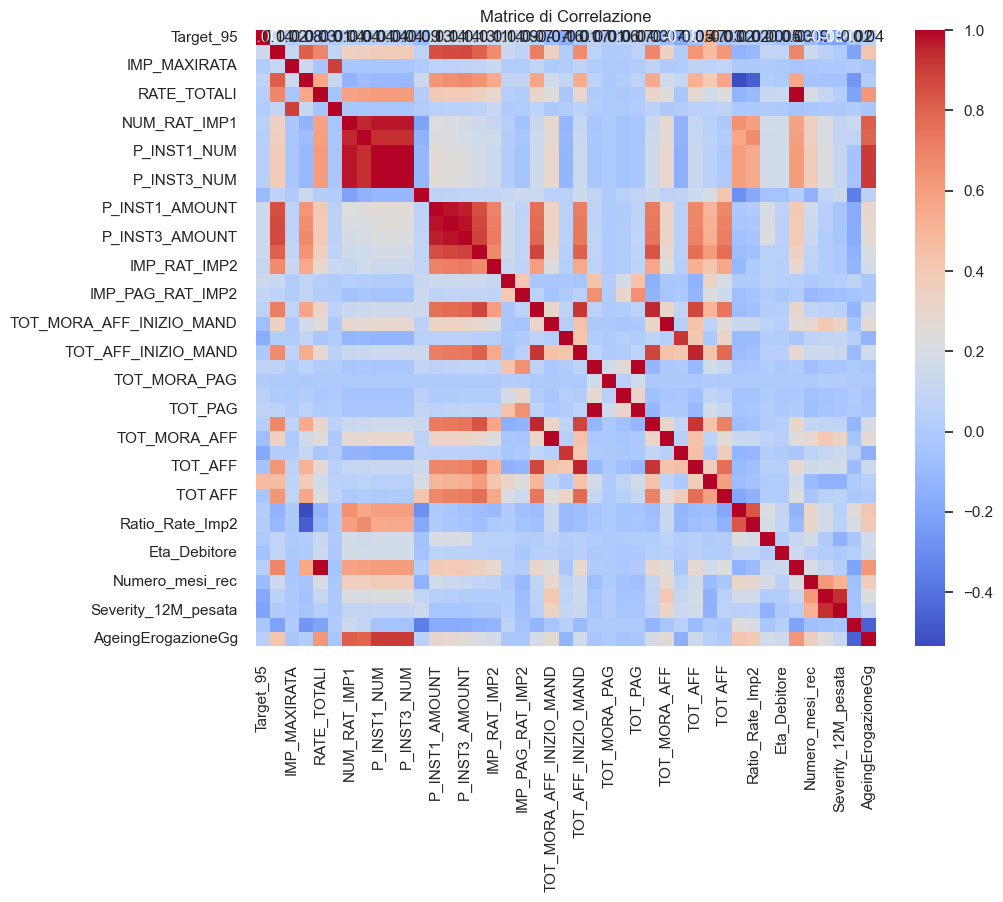

In [22]:
correlation_matrix = df_cluster.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()

In [23]:
# Analisi grafica 
def func_analisi_grafica(df, numeric_var):
    ''' Definisco la funzione per distribution plot, boxplot e Q-Q plot delle variabili numeriche '''
    plt.figure(figsize=(16,8))
    
    # Distribution plot
    plt.subplot(1,3,1)
    sns.histplot(data=df, x=df[numeric_var], element="step", stat="density")
    plt.title("Distribution plot of "+numeric_var)
       
    # Box plot
    plt.subplot(1,3,2)
    sns.boxplot(x=df[numeric_var], data=df)
    plt.title("Box plot of "+numeric_var)
    
    # Box plot
    plt.subplot(1,3,3)
    df[numeric_var].fillna(0, inplace = True)
    stats.probplot(df[numeric_var], dist="norm", plot=plt)
    plt.title("Q-Q plot of "+numeric_var)
    
    plt.show()

In [24]:
#numerical_vars
numerical_vars = [f for f in df_variabili_numeriche.columns if f!='Target_95']

#categorical_vars
categorical_vars = [f for f in df_variabili_categoriche.columns if f!='Target_95']

<h5> Analisi grafica </h5>

In [25]:
# for variable in numerical_vars:
#     func_analisi_grafica(df_clienti, variable)
#     print("*"*110)

<h5> Aggiungo una colonna RATIO_ONERI_AFF_TOT_AFF tra TOT_ONERI_AFF E TOT_AFF </h5>

In [26]:
df_arricchito = df_cluster.copy()

In [27]:
df_arricchito['RATIO_ONERI_AFF_TOT_AFF'] = df_arricchito['TOT_ONERI_AFF'] / df_arricchito['TOT_AFF']

In [28]:
df_arricchito[df_arricchito['RATIO_ONERI_AFF_TOT_AFF'] > 1]

,Target_95,Chiave,PRATICA,DELIN_HISTORY,MOD_PAGAM,MOD_PAG,TIPO_GARANTE,Denominazione Regione,CODICE_PHONIA,DES_PRODOTTO,DES_BENE,DATA_AFFIDO,DATA_FINE_AFFIDO,DATA_FINANZIAM,DT_VAL_ULT_PAGAM,DATA_ESTINZ,DATA_AGGIORNAMENTO,P_INST1_DUE_DATE,P_INST2_DUE_DATE,P_INST3_DUE_DATE,DT_VAL_RAT_IMP1,DT_VAL_RAT_IMP2,P_INST1_VAL_DATE,P_INST3_VAL_DATE,SCAD_MAXIRATA,SCAD_RAT_IMP2,SCAD_RAT_IMP1,IMP_FINANZIATO,IMP_MAXIRATA,CURRENT_BALANCE,P_INST1_AMOUNT_PAID,P_INST2_AMOUNT_PAID,P_INST3_AMOUNT_PAID,RATE_TOTALI,NUM_RATE_RIFI,NUM_RAT_IMP1,NUM_RAT_IMP2,P_INST1_NUM,P_INST2_NUM,P_INST3_NUM,NUMERO RATE,PROVINCIA,P_INST1_AMOUNT,P_INST2_AMOUNT,P_INST3_AMOUNT,IMP_RAT_IMP1,IMP_RAT_IMP2,IMP_PAG_RAT_IMP1,IMP_PAG_RAT_IMP2,TOT_RATE_AFF_INIZIO_MAND,TOT_MORA_AFF_INIZIO_MAND,TOT_ONERI_AFF_INIZIO_MAND,TOT_AFF_INIZIO_MAND,TOT_RATE_PAG,TOT_MORA_PAG,TOT_ONERI_PAG,TOT_PAG,TOT_RATE_AFF,TOT_MORA_AFF,TOT_ONERI_AFF,TOT_AFF,Flag_Riciclo_SDD,TOT REC,TOT AFF,Flag_Rifinanziamento,Flag_Garante,Flag_Cointestazione,Metodo_pagamento,Ratio_Rate_Imp1,Ratio_Rate_Imp2,DistanzaAffidoUltimoPagamento,Sesso,Eta_Debitore,NOSTART12M,NOSTART6M,DurataFinanziamento,Flag_Galleggiamento_3M,Flag_Galleggiamento_6M,Flag_Gestione_Prec,Flag_InsolvenzaGrave_3M,Flag_InsolvenzaGrave_6M,Flag_Miglioramento_3M,Flag_Rate_piu_uno,Flag_rientrototale_6M,Flag_Scivolamento_3M,Flag_Scivolamento_6M,Numero_mesi_rec,Severity_12M,Severity_12M_pesata,Flag_InsolvenzaGrave_12M,FlagRecOver100,AgeingGestioneGg,AgeingErogazioneGg,DESCRIZIONE PRODOTTO,RATIO_ONERI_AFF_TOT_AFF


In [29]:
df_arricchito

,Target_95,Chiave,PRATICA,DELIN_HISTORY,MOD_PAGAM,MOD_PAG,TIPO_GARANTE,Denominazione Regione,CODICE_PHONIA,DES_PRODOTTO,DES_BENE,DATA_AFFIDO,DATA_FINE_AFFIDO,DATA_FINANZIAM,DT_VAL_ULT_PAGAM,DATA_ESTINZ,DATA_AGGIORNAMENTO,P_INST1_DUE_DATE,P_INST2_DUE_DATE,P_INST3_DUE_DATE,DT_VAL_RAT_IMP1,DT_VAL_RAT_IMP2,P_INST1_VAL_DATE,P_INST3_VAL_DATE,SCAD_MAXIRATA,SCAD_RAT_IMP2,SCAD_RAT_IMP1,IMP_FINANZIATO,IMP_MAXIRATA,CURRENT_BALANCE,P_INST1_AMOUNT_PAID,P_INST2_AMOUNT_PAID,P_INST3_AMOUNT_PAID,RATE_TOTALI,NUM_RATE_RIFI,NUM_RAT_IMP1,NUM_RAT_IMP2,P_INST1_NUM,P_INST2_NUM,P_INST3_NUM,NUMERO RATE,PROVINCIA,P_INST1_AMOUNT,P_INST2_AMOUNT,P_INST3_AMOUNT,IMP_RAT_IMP1,IMP_RAT_IMP2,IMP_PAG_RAT_IMP1,IMP_PAG_RAT_IMP2,TOT_RATE_AFF_INIZIO_MAND,TOT_MORA_AFF_INIZIO_MAND,TOT_ONERI_AFF_INIZIO_MAND,TOT_AFF_INIZIO_MAND,TOT_RATE_PAG,TOT_MORA_PAG,TOT_ONERI_PAG,TOT_PAG,TOT_RATE_AFF,TOT_MORA_AFF,TOT_ONERI_AFF,TOT_AFF,Flag_Riciclo_SDD,TOT REC,TOT AFF,Flag_Rifinanziamento,Flag_Garante,Flag_Cointestazione,Metodo_pagamento,Ratio_Rate_Imp1,Ratio_Rate_Imp2,DistanzaAffidoUltimoPagamento,Sesso,Eta_Debitore,NOSTART12M,NOSTART6M,DurataFinanziamento,Flag_Galleggiamento_3M,Flag_Galleggiamento_6M,Flag_Gestione_Prec,Flag_InsolvenzaGrave_3M,Flag_InsolvenzaGrave_6M,Flag_Miglioramento_3M,Flag_Rate_piu_uno,Flag_rientrototale_6M,Flag_Scivolamento_3M,Flag_Scivolamento_6M,Numero_mesi_rec,Severity_12M,Severity_12M_pesata,Flag_InsolvenzaGrave_12M,FlagRecOver100,AgeingGestioneGg,AgeingErogazioneGg,DESCRIZIONE PRODOTTO,RATIO_ONERI_AFF_TOT_AFF
0,0,00000854016301_08_2021,00000854016301,13221222111111143332432332111100000000,P,BP,C,Lazio,ALPTEL,PRESTITO PERSONALE,None,2021-08-02,2021-09-05,2018-06-12,2021-07-05,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-06-16,2021-07-05,None,2021-08-12,2021-07-12,"15,200.00",0.00,"9,770.58",0000000023700,0000000023700,0000000023700,84.00,0.00,37.00,38.00,34.00,35.00,36.00,2,LT,237.00,237.00,237.00,237.00,237.00,0.00,0.00,237.00,28.24,12.00,277.24,0.00,0.00,0.00,0.00,237.00,28.24,12.00,277.24,None,0.00,486.00,NO,SI,SI,BP,0.44,0.45,-1.00,None,NaN,NO,NO,7.00,NO,NO,NO,SI,SI,NO,SI,NO,NO,NO,12.00,1.58,0.95,SI,0,21.00,"1,126.00",PRESTITO PERSONALE,0.04
1,0,00006003826200_08_2021,00006003826200,1001000000000000000000000000000000001100100110...,P,BP,None,Liguria,ALPTEL,REPEAT BUSINESS,FIDELIZ.OTTIMI,2021-08-10,2021-09-05,2016-05-12,2021-06-09,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-16,2021-06-09,None,2021-08-12,2021-07-12,"14,234.40",0.00,"8,636.46",0000000018350,0000000018350,0000000018350,120.00,0.00,62.00,63.00,59.00,60.00,61.00,2,IM,183.50,183.50,183.50,183.50,183.50,0.00,0.00,183.50,1.56,12.00,197.06,0.00,0.00,0.00,0.00,183.50,1.56,12.00,197.06,Y,0.00,379.00,NO,NO,NO,BP,0.52,0.53,-2.00,Donna,59.00,NO,NO,10.00,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,1.00,0.17,0.15,NO,0,29.00,"1,887.00",FINANZIAMENTI AZIENDE,0.06
2,0,00002286163301_08_2021,00002286163301,111010,P,BP,None,Calabria,ALPTEL,ELETTRONICA & ELETTRODOME,None,2021-08-10,2021-09-05,2021-02-10,2021-06-14,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-12,2021-06-14,None,2021-08-12,2021-07-12,"1,500.00",0.00,"1,329.19",0000000005650,0000000005650,0000000005650,30.00,0.00,5.00,6.00,2.00,3.00,4.00,2,KR,56.50,56.50,56.50,56.50,56.50,0.00,0.00,56.50,0.58,15.97,73.05,0.00,0.00,0.00,0.00,56.50,0.58,15.97,73.05,None,0.00,144.94,NO,NO,NO,BP,0.17,0.20,-2.00,Donna,57.00,SI,SI,2.50,SI,NO,SI,NO,NO,NO,NO,SI,NO,NO,3.00,0.67,0.57,NO,0,29.00,152.00,ELETTRONICA & ELETTRODOME,0.22
3,0,00001576642301_08_2021,00001576642301,10012101111101110000000,P,BP,None,Sicilia,ALPTEL,REPEAT BUSINESS,None,2021-08-10,2021-09-05,2019-09-12,2021-05-27,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-26,2021-05-27,None,2021-08-12,2021-07-12,"14,280.00",0.00,"10,954.69",0000000026000,0000000026000,0000000026000,72.00,0.00,22.00,23.00,19.00,20.00,21.00,2,EN,260.00,260.00,260.00,260.00,260.00,0.00,0.00,260.00,16.20,12.00,288.20,0.00,0.00,0.00,0.00,260.00,16.20,12.00,288.20,Non

<h5> Rimuovo le colonne non necessarie </h5>

In [30]:
df_clienti_con_meno_colonne = df_arricchito.copy()

In [31]:
df_clienti_con_meno_colonne

,Target_95,Chiave,PRATICA,DELIN_HISTORY,MOD_PAGAM,MOD_PAG,TIPO_GARANTE,Denominazione Regione,CODICE_PHONIA,DES_PRODOTTO,DES_BENE,DATA_AFFIDO,DATA_FINE_AFFIDO,DATA_FINANZIAM,DT_VAL_ULT_PAGAM,DATA_ESTINZ,DATA_AGGIORNAMENTO,P_INST1_DUE_DATE,P_INST2_DUE_DATE,P_INST3_DUE_DATE,DT_VAL_RAT_IMP1,DT_VAL_RAT_IMP2,P_INST1_VAL_DATE,P_INST3_VAL_DATE,SCAD_MAXIRATA,SCAD_RAT_IMP2,SCAD_RAT_IMP1,IMP_FINANZIATO,IMP_MAXIRATA,CURRENT_BALANCE,P_INST1_AMOUNT_PAID,P_INST2_AMOUNT_PAID,P_INST3_AMOUNT_PAID,RATE_TOTALI,NUM_RATE_RIFI,NUM_RAT_IMP1,NUM_RAT_IMP2,P_INST1_NUM,P_INST2_NUM,P_INST3_NUM,NUMERO RATE,PROVINCIA,P_INST1_AMOUNT,P_INST2_AMOUNT,P_INST3_AMOUNT,IMP_RAT_IMP1,IMP_RAT_IMP2,IMP_PAG_RAT_IMP1,IMP_PAG_RAT_IMP2,TOT_RATE_AFF_INIZIO_MAND,TOT_MORA_AFF_INIZIO_MAND,TOT_ONERI_AFF_INIZIO_MAND,TOT_AFF_INIZIO_MAND,TOT_RATE_PAG,TOT_MORA_PAG,TOT_ONERI_PAG,TOT_PAG,TOT_RATE_AFF,TOT_MORA_AFF,TOT_ONERI_AFF,TOT_AFF,Flag_Riciclo_SDD,TOT REC,TOT AFF,Flag_Rifinanziamento,Flag_Garante,Flag_Cointestazione,Metodo_pagamento,Ratio_Rate_Imp1,Ratio_Rate_Imp2,DistanzaAffidoUltimoPagamento,Sesso,Eta_Debitore,NOSTART12M,NOSTART6M,DurataFinanziamento,Flag_Galleggiamento_3M,Flag_Galleggiamento_6M,Flag_Gestione_Prec,Flag_InsolvenzaGrave_3M,Flag_InsolvenzaGrave_6M,Flag_Miglioramento_3M,Flag_Rate_piu_uno,Flag_rientrototale_6M,Flag_Scivolamento_3M,Flag_Scivolamento_6M,Numero_mesi_rec,Severity_12M,Severity_12M_pesata,Flag_InsolvenzaGrave_12M,FlagRecOver100,AgeingGestioneGg,AgeingErogazioneGg,DESCRIZIONE PRODOTTO,RATIO_ONERI_AFF_TOT_AFF
0,0,00000854016301_08_2021,00000854016301,13221222111111143332432332111100000000,P,BP,C,Lazio,ALPTEL,PRESTITO PERSONALE,None,2021-08-02,2021-09-05,2018-06-12,2021-07-05,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-06-16,2021-07-05,None,2021-08-12,2021-07-12,"15,200.00",0.00,"9,770.58",0000000023700,0000000023700,0000000023700,84.00,0.00,37.00,38.00,34.00,35.00,36.00,2,LT,237.00,237.00,237.00,237.00,237.00,0.00,0.00,237.00,28.24,12.00,277.24,0.00,0.00,0.00,0.00,237.00,28.24,12.00,277.24,None,0.00,486.00,NO,SI,SI,BP,0.44,0.45,-1.00,None,NaN,NO,NO,7.00,NO,NO,NO,SI,SI,NO,SI,NO,NO,NO,12.00,1.58,0.95,SI,0,21.00,"1,126.00",PRESTITO PERSONALE,0.04
1,0,00006003826200_08_2021,00006003826200,1001000000000000000000000000000000001100100110...,P,BP,None,Liguria,ALPTEL,REPEAT BUSINESS,FIDELIZ.OTTIMI,2021-08-10,2021-09-05,2016-05-12,2021-06-09,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-16,2021-06-09,None,2021-08-12,2021-07-12,"14,234.40",0.00,"8,636.46",0000000018350,0000000018350,0000000018350,120.00,0.00,62.00,63.00,59.00,60.00,61.00,2,IM,183.50,183.50,183.50,183.50,183.50,0.00,0.00,183.50,1.56,12.00,197.06,0.00,0.00,0.00,0.00,183.50,1.56,12.00,197.06,Y,0.00,379.00,NO,NO,NO,BP,0.52,0.53,-2.00,Donna,59.00,NO,NO,10.00,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,1.00,0.17,0.15,NO,0,29.00,"1,887.00",FINANZIAMENTI AZIENDE,0.06
2,0,00002286163301_08_2021,00002286163301,111010,P,BP,None,Calabria,ALPTEL,ELETTRONICA & ELETTRODOME,None,2021-08-10,2021-09-05,2021-02-10,2021-06-14,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-12,2021-06-14,None,2021-08-12,2021-07-12,"1,500.00",0.00,"1,329.19",0000000005650,0000000005650,0000000005650,30.00,0.00,5.00,6.00,2.00,3.00,4.00,2,KR,56.50,56.50,56.50,56.50,56.50,0.00,0.00,56.50,0.58,15.97,73.05,0.00,0.00,0.00,0.00,56.50,0.58,15.97,73.05,None,0.00,144.94,NO,NO,NO,BP,0.17,0.20,-2.00,Donna,57.00,SI,SI,2.50,SI,NO,SI,NO,NO,NO,NO,SI,NO,NO,3.00,0.67,0.57,NO,0,29.00,152.00,ELETTRONICA & ELETTRODOME,0.22
3,0,00001576642301_08_2021,00001576642301,10012101111101110000000,P,BP,None,Sicilia,ALPTEL,REPEAT BUSINESS,None,2021-08-10,2021-09-05,2019-09-12,2021-05-27,None,01/01/0001,2021-04-12,2021-05-12,2021-06-12,None,None,2021-04-26,2021-05-27,None,2021-08-12,2021-07-12,"14,280.00",0.00,"10,954.69",0000000026000,0000000026000,0000000026000,72.00,0.00,22.00,23.00,19.00,20.00,21.00,2,EN,260.00,260.00,260.00,260.00,260.00,0.00,0.00,260.00,16.20,12.00,288.20,0.00,0.00,0.00,0.00,260.00,16.20,12.00,288.20,Non

In [32]:
sorted(df_clienti_con_meno_colonne.columns)

['AgeingErogazioneGg',
 'AgeingGestioneGg',
 'CODICE_PHONIA',
 'CURRENT_BALANCE',
 'Chiave',
 'DATA_AFFIDO',
 'DATA_AGGIORNAMENTO',
 'DATA_ESTINZ',
 'DATA_FINANZIAM',
 'DATA_FINE_AFFIDO',
 'DELIN_HISTORY',
 'DESCRIZIONE PRODOTTO',
 'DES_BENE',
 'DES_PRODOTTO',
 'DT_VAL_RAT_IMP1',
 'DT_VAL_RAT_IMP2',
 'DT_VAL_ULT_PAGAM',
 'Denominazione Regione',
 'DistanzaAffidoUltimoPagamento',
 'DurataFinanziamento',
 'Eta_Debitore',
 'FlagRecOver100',
 'Flag_Cointestazione',
 'Flag_Galleggiamento_3M',
 'Flag_Galleggiamento_6M',
 'Flag_Garante',
 'Flag_Gestione_Prec',
 'Flag_InsolvenzaGrave_12M',
 'Flag_InsolvenzaGrave_3M',
 'Flag_InsolvenzaGrave_6M',
 'Flag_Miglioramento_3M',
 'Flag_Rate_piu_uno',
 'Flag_Riciclo_SDD',
 'Flag_Rifinanziamento',
 'Flag_Scivolamento_3M',
 'Flag_Scivolamento_6M',
 'Flag_rientrototale_6M',
 'IMP_FINANZIATO',
 'IMP_MAXIRATA',
 'IMP_PAG_RAT_IMP1',
 'IMP_PAG_RAT_IMP2',
 'IMP_RAT_IMP1',
 'IMP_RAT_IMP2',
 'MOD_PAG',
 'MOD_PAGAM',
 'Metodo_pagamento',
 'NOSTART12M',
 'NOSTART6M

In [33]:
colonne_da_usare = ['Target_95','Denominazione Regione', 'AgeingGestioneGg', 'DESCRIZIONE PRODOTTO', 'NUMERO RATE', 'Ratio_Rate_Imp1', 'TOT_AFF', 'AgeingErogazioneGg', 'Eta_Debitore', 'IMP_FINANZIATO', 'RATIO_ONERI_AFF_TOT_AFF']

In [34]:
df_clienti_con_meno_colonne = df_clienti_con_meno_colonne[colonne_da_usare]

In [35]:
df_clienti_con_meno_colonne

,Target_95,Denominazione Regione,AgeingGestioneGg,DESCRIZIONE PRODOTTO,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,Eta_Debitore,IMP_FINANZIATO,RATIO_ONERI_AFF_TOT_AFF
0,0,Lazio,21.00,PRESTITO PERSONALE,2,0.44,277.24,"1,126.00",NaN,"15,200.00",0.04
1,0,Liguria,29.00,FINANZIAMENTI AZIENDE,2,0.52,197.06,"1,887.00",59.00,"14,234.40",0.06
2,0,Calabria,29.00,ELETTRONICA & ELETTRODOME,2,0.17,73.05,152.00,57.00,"1,500.00",0.22
3,0,Sicilia,29.00,FINANZIAMENTI AZIENDE,2,0.31,288.20,669.00,76.00,"14,280.00",0.04
4,0,Lazio,28.00,SPESE MEDICHE,2,0.12,199.57,180.00,57.00,"6,800.00",0.16
...,...,...,...,...,...,...,...,...,...,...,...
148458,0,Lazio,15.00,AUTOMOTIVE NUOVO,2,0.29,108.17,426.00,NaN,"4,120.88",0.00
148459,1,Umbria,15.00,PRESTITO PERSONALE,2,0.32,116.85,699.00,NaN,"6,250.00",0.00
148460,0,Lombardia,15.00,PRESTITI CON TRATTENUTA,2,0.45,305.41,821.00,NaN,"14,492.80",0.00
148461,0,Lombardia,15.00,SPESE MEDICHE,2,0.50,95.76,"1,125.00",61.00,"6,654.00",0.00


<h6> Rimuovo le colonne che hanno più del 50% di valori missing </h6>

In [36]:
percentuale_mancanti = (df_clienti_con_meno_colonne.isna().sum() / len(df_clienti_con_meno_colonne)).sort_values(ascending=False)
colonne_da_mantenere = percentuale_mancanti[percentuale_mancanti <= 0.5].index

In [37]:
percentuale_mancanti[percentuale_mancanti>0.5]

Series([], dtype: float64)

In [38]:
def rimuovi_colonne_con_valori_mancanti(df, soglia=0.5):
    # Calcolo la percentuale di valori mancanti per ciascuna colonna
    percentuale_mancanti = (df.isna().sum() / len(df)).sort_values(ascending=False)
    
    # Seleziono le colonne con al massimo il 50% di valori mancanti
    colonne_da_mantenere = percentuale_mancanti[percentuale_mancanti <= soglia].index
    
    # Creo un nuovo DataFrame con solo le colonne da mantenere
    df_senza_colonne_mancanti = df[colonne_da_mantenere]
    
    return df_senza_colonne_mancanti

In [39]:
df_clienti_con_meno_colonne = rimuovi_colonne_con_valori_mancanti(df_clienti_con_meno_colonne)

In [40]:
df_clienti_con_meno_colonne.shape

(148463, 11)

<h6> Rimuovo le colonne con 1 solo valore unico </h6>

In [41]:
# Check colonne con valori univoci
df_unique = df_clienti_con_meno_colonne.loc[:,df_clienti_con_meno_colonne.nunique()<2]
df_unique.columns
# Queste colonne sono da eliminare dal dataset

Index([], dtype='object')

In [42]:
# Elimino le colonne che hanno 1 solo valore unico

df_clienti_con_meno_colonne = df_clienti_con_meno_colonne.drop(columns= df_unique.columns, axis=1)

In [43]:
df_clienti_con_meno_colonne.shape

(148463, 11)

In [44]:
df_clienti_con_meno_colonne

,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,Denominazione Regione,Target_95,AgeingGestioneGg,DESCRIZIONE PRODOTTO,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO
0,NaN,0.04,Lazio,0,21.00,PRESTITO PERSONALE,2,0.44,277.24,"1,126.00","15,200.00"
1,59.00,0.06,Liguria,0,29.00,FINANZIAMENTI AZIENDE,2,0.52,197.06,"1,887.00","14,234.40"
2,57.00,0.22,Calabria,0,29.00,ELETTRONICA & ELETTRODOME,2,0.17,73.05,152.00,"1,500.00"
3,76.00,0.04,Sicilia,0,29.00,FINANZIAMENTI AZIENDE,2,0.31,288.20,669.00,"14,280.00"
4,57.00,0.16,Lazio,0,28.00,SPESE MEDICHE,2,0.12,199.57,180.00,"6,800.00"
...,...,...,...,...,...,...,...,...,...,...,...
148458,NaN,0.00,Lazio,0,15.00,AUTOMOTIVE NUOVO,2,0.29,108.17,426.00,"4,120.88"
148459,NaN,0.00,Umbria,1,15.00,PRESTITO PERSONALE,2,0.32,116.85,699.00,"6,250.00"
148460,NaN,0.00,Lombardia,0,15.00,PRESTITI CON TRATTENUTA,2,0.45,305.41,821.00,"14,492.80"
148461,61.00,0.00,Lombardia,0,15.00,SPESE MEDICHE,2,0.50,95.76,"1,125.00","6,654.00"


<h5> Trattamento outliers </h5>

In [45]:
df_clienti_senza_outliers = df_clienti_con_meno_colonne.copy()

In [46]:
df_clienti_senza_outliers

,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,Denominazione Regione,Target_95,AgeingGestioneGg,DESCRIZIONE PRODOTTO,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO
0,NaN,0.04,Lazio,0,21.00,PRESTITO PERSONALE,2,0.44,277.24,"1,126.00","15,200.00"
1,59.00,0.06,Liguria,0,29.00,FINANZIAMENTI AZIENDE,2,0.52,197.06,"1,887.00","14,234.40"
2,57.00,0.22,Calabria,0,29.00,ELETTRONICA & ELETTRODOME,2,0.17,73.05,152.00,"1,500.00"
3,76.00,0.04,Sicilia,0,29.00,FINANZIAMENTI AZIENDE,2,0.31,288.20,669.00,"14,280.00"
4,57.00,0.16,Lazio,0,28.00,SPESE MEDICHE,2,0.12,199.57,180.00,"6,800.00"
...,...,...,...,...,...,...,...,...,...,...,...
148458,NaN,0.00,Lazio,0,15.00,AUTOMOTIVE NUOVO,2,0.29,108.17,426.00,"4,120.88"
148459,NaN,0.00,Umbria,1,15.00,PRESTITO PERSONALE,2,0.32,116.85,699.00,"6,250.00"
148460,NaN,0.00,Lombardia,0,15.00,PRESTITI CON TRATTENUTA,2,0.45,305.41,821.00,"14,492.80"
148461,61.00,0.00,Lombardia,0,15.00,SPESE MEDICHE,2,0.50,95.76,"1,125.00","6,654.00"


In [47]:
# mi assicuro che la colonna "Target_95" sia numerica perchè altrimenti il codice dopo mi dà errore
df_clienti_senza_outliers['Target_95'] = pd.to_numeric(df_clienti_senza_outliers['Target_95'], errors = 'coerce') # Quando viene utilizzato il valore 'coerce', la funzione tenterà di convertire i dati in numeri, ma se la conversione non è possibile imposterà il valore sulla rappresentazione numerica NaN (Not-a-Number). Questo significa che se ci sono dati non numerici, la funzione li "ignorerà" assegnando loro NaN anziché generare un errore; l'altro valore possibile per "errors" è "raise", che dà errore nel caso non riesca a convertire qualcosa

In [48]:
# Spostiamo il Target_95 sulla prima colonna
move_column_inplace(df_clienti_senza_outliers,'Target_95',0)

In [49]:
df_eccezioni = pd.read_excel('Eccezioni outliers.xlsx')

# Cerco la riga che contiene "eccezioni" nella prima cella
riga_eccezioni = None
for index, row in df_eccezioni.iterrows():
    if row.iloc[0] == 'eccezioni':
        riga_eccezioni = row
        break

# Creo una lista vuota per memorizzare i nomi delle colonne con "exception"
colonne_eccezione = []

# Itero sulle colonne del DataFrame
for colonna in df_eccezioni.columns:
    # Verifica se il valore nella cella corrispondente alla riga "eccezioni" è "exception"
    if riga_eccezioni[colonna] == 'exception':
        colonne_eccezione.append(colonna)

print("Colonne con 'exception':", colonne_eccezione)

Colonne con 'exception': ['IMP_MAXIRATA', 'P_INST1_AMOUNT_PAID', 'P_INST2_AMOUNT_PAID', 'P_INST3_AMOUNT_PAID', 'RATE_TOTALI', 'NUM_RATE_RIFI', 'NUM_RAT_IMP1', 'NUM_RAT_IMP2', 'P_INST1_NUM', 'P_INST2_NUM', 'P_INST3_NUM', 'P_INST1_AMOUNT', 'P_INST2_AMOUNT', 'P_INST3_AMOUNT', 'IMP_RAT_IMP1', 'IMP_RAT_IMP2', 'IMP_PAG_RAT_IMP1', 'IMP_PAG_RAT_IMP2', 'TOT_MORA_AFF', 'TOT REC', 'Ratio_Rate_Imp1', 'Ratio_Rate_Imp2', 'Ageing_Erogazione_mesi', 'DistanzaAffidoUltimoPagamento', 'Eta_Debitore', 'DurataFinanziamento', 'Numero_mesi_rec', 'Severity_12M', 'Severity_12M_pesata']


In [50]:
def rimuovi_outliers_oltre_x_deviazioni_standard_dalla_media(df, x, eccezioni=[]):
    # Copia il DataFrame originale
    df_copia = df.copy()

    # Escludi le colonne presenti in eccezioni
    colonne_da_escludere = [col for col in df_copia.columns if col in eccezioni]
    df_copia = df_copia.drop(columns=colonne_da_escludere)

    # Seleziona solo le colonne numeriche (escludendo 'Target_95' e le colonne in eccezioni)
    colonne_numeriche = df_copia.select_dtypes(include=[np.number])

    # Calcola lo z-score per ciascuna colonna nel DataFrame
    z_scores = zscore(colonne_numeriche)
    print('z_scores:')
    print(z_scores)
    
    outlier_indices = (np.abs(z_scores) > x).any(axis=1)
    print('outlier_indices:')
    print(outlier_indices)

    df_senza_outliers = df[~outlier_indices] # ho scoperto che la tilde "~" serve a negare la maschera booleana in questione, quindi in df_senza_outliers finiscono tutte le righe che NON fanno parte di outlier_indices
    return df_senza_outliers

In [51]:
# rimuovo gli outliers (solo per le colonne numeriche ovviamente)
df_clienti_senza_outliers = rimuovi_outliers_oltre_x_deviazioni_standard_dalla_media(df_clienti_senza_outliers, 3, colonne_eccezione)

z_scores:
        Target_95  RATIO_ONERI_AFF_TOT_AFF  AgeingGestioneGg  NUMERO RATE  \
0           -0.80                      NaN              0.23         0.80   
1           -0.80                      NaN              0.25         0.80   
2           -0.80                      NaN              0.25         0.80   
3           -0.80                      NaN              0.25         0.80   
4           -0.80                      NaN              0.25         0.80   
...           ...                      ...               ...          ...   
148458      -0.80                      NaN              0.21         0.80   
148459       1.25                      NaN              0.21         0.80   
148460      -0.80                      NaN              0.21         0.80   
148461      -0.80                      NaN              0.21         0.80   
148462      -0.80                      NaN              0.21         0.80   

        TOT_AFF  AgeingErogazioneGg  IMP_FINANZIATO  
0          

In [52]:
df_clienti_senza_outliers.shape

(139010, 11)

In [53]:
df_clienti_senza_outliers

,Target_95,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,Denominazione Regione,AgeingGestioneGg,DESCRIZIONE PRODOTTO,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO
0,0,NaN,0.04,Lazio,21.00,PRESTITO PERSONALE,2,0.44,277.24,"1,126.00","15,200.00"
1,0,59.00,0.06,Liguria,29.00,FINANZIAMENTI AZIENDE,2,0.52,197.06,"1,887.00","14,234.40"
2,0,57.00,0.22,Calabria,29.00,ELETTRONICA & ELETTRODOME,2,0.17,73.05,152.00,"1,500.00"
3,0,76.00,0.04,Sicilia,29.00,FINANZIAMENTI AZIENDE,2,0.31,288.20,669.00,"14,280.00"
4,0,57.00,0.16,Lazio,28.00,SPESE MEDICHE,2,0.12,199.57,180.00,"6,800.00"
...,...,...,...,...,...,...,...,...,...,...,...
148458,0,NaN,0.00,Lazio,15.00,AUTOMOTIVE NUOVO,2,0.29,108.17,426.00,"4,120.88"
148459,1,NaN,0.00,Umbria,15.00,PRESTITO PERSONALE,2,0.32,116.85,699.00,"6,250.00"
148460,0,NaN,0.00,Lombardia,15.00,PRESTITI CON TRATTENUTA,2,0.45,305.41,821.00,"14,492.80"
148461,0,61.00,0.00,Lombardia,15.00,SPESE MEDICHE,2,0.50,95.76,"1,125.00","6,654.00"


<h5> Mi salvo in un file le righe contenenti gli outliers che ho rimosso </h5>

In [54]:
removed_rows = df_clienti_con_meno_colonne[~df_clienti_con_meno_colonne.index.isin(df_clienti_senza_outliers.index)]

# removed_rows.to_excel('df_con_righe_rimosse_custom_più_colonne.xlsx', index=False)

<h5> Rimuovo di nuovo le colonne con 1 solo valore unico perchè dopo la rimozione degli outliers alcune potrebbero avere di nuovo 1 solo valore unico </h5>

In [55]:
# Check colonne con valori univoci
df_unique = df_clienti_senza_outliers.loc[:,df_clienti_senza_outliers.nunique()<2]
df_unique.columns
# Queste colonne sono da eliminare dal dataset

Index([], dtype='object')

In [56]:
# Elimino le colonne che hanno 1 solo valore unico

df_clienti_con_meno_colonne_2 = df_clienti_senza_outliers.drop(columns= df_unique.columns, axis=1)

In [57]:
df_clienti_con_meno_colonne_2.shape

(139010, 11)

In [58]:
df_clienti_con_meno_colonne_2

,Target_95,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,Denominazione Regione,AgeingGestioneGg,DESCRIZIONE PRODOTTO,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO
0,0,NaN,0.04,Lazio,21.00,PRESTITO PERSONALE,2,0.44,277.24,"1,126.00","15,200.00"
1,0,59.00,0.06,Liguria,29.00,FINANZIAMENTI AZIENDE,2,0.52,197.06,"1,887.00","14,234.40"
2,0,57.00,0.22,Calabria,29.00,ELETTRONICA & ELETTRODOME,2,0.17,73.05,152.00,"1,500.00"
3,0,76.00,0.04,Sicilia,29.00,FINANZIAMENTI AZIENDE,2,0.31,288.20,669.00,"14,280.00"
4,0,57.00,0.16,Lazio,28.00,SPESE MEDICHE,2,0.12,199.57,180.00,"6,800.00"
...,...,...,...,...,...,...,...,...,...,...,...
148458,0,NaN,0.00,Lazio,15.00,AUTOMOTIVE NUOVO,2,0.29,108.17,426.00,"4,120.88"
148459,1,NaN,0.00,Umbria,15.00,PRESTITO PERSONALE,2,0.32,116.85,699.00,"6,250.00"
148460,0,NaN,0.00,Lombardia,15.00,PRESTITI CON TRATTENUTA,2,0.45,305.41,821.00,"14,492.80"
148461,0,61.00,0.00,Lombardia,15.00,SPESE MEDICHE,2,0.50,95.76,"1,125.00","6,654.00"


<h5> Riempio eventuali colonne con valori missing </h5>

In [59]:
df_clienti_con_meno_colonne_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139010 entries, 0 to 148462
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Target_95                139010 non-null  int32  
 1   Eta_Debitore             107139 non-null  float64
 2   RATIO_ONERI_AFF_TOT_AFF  138884 non-null  float64
 3   Denominazione Regione    139009 non-null  object 
 4   AgeingGestioneGg         139010 non-null  float64
 5   DESCRIZIONE PRODOTTO     139010 non-null  object 
 6   NUMERO RATE              139010 non-null  int32  
 7   Ratio_Rate_Imp1          139010 non-null  float64
 8   TOT_AFF                  139010 non-null  float64
 9   AgeingErogazioneGg       139010 non-null  float64
 10  IMP_FINANZIATO           139010 non-null  float64
dtypes: float64(7), int32(2), object(2)
memory usage: 11.7+ MB


In [60]:
# conto quanti nan ci sono in ogni colonna
df_clienti_con_meno_colonne_2.isna().sum()

Target_95                      0
Eta_Debitore               31871
RATIO_ONERI_AFF_TOT_AFF      126
Denominazione Regione          1
AgeingGestioneGg               0
DESCRIZIONE PRODOTTO           0
NUMERO RATE                    0
Ratio_Rate_Imp1                0
TOT_AFF                        0
AgeingErogazioneGg             0
IMP_FINANZIATO                 0
dtype: int64

In [61]:
# conto quanti nan ci sono in totale
df_clienti_con_meno_colonne_2.isna().sum().sum()

31998

In [62]:
def riempi_nan_con_media_e_missing(df):
    # Crea una copia del DataFrame originale perchè altrimenti mi modifica anche il dataframe originale mi pare
    df_copia = df.copy()
    
    for colonna in df_copia.columns:
        tipo_colonna = pd.api.types.infer_dtype(df_copia[colonna])
        # print(f'Tipo colonna {colonna}: {tipo_colonna}')
        if tipo_colonna in ['integer', 'floating']:
            # Per le colonne numeriche (e non bool o complex), calcolo la mediana e riempio i NaN con la mediana
            mediana_colonna = df_copia[colonna].median()
            df_copia[colonna] = df_copia[colonna].fillna(mediana_colonna)
        else:
            # Per le colonne non numeriche (inclusi però bool e complex, che qui non ci sono), riempio i NaN con "Missing"
            df_copia[colonna] = df_copia[colonna].fillna("Missing")
    return df_copia

In [63]:
df_senza_valori_nan = riempi_nan_con_media_e_missing(df_clienti_con_meno_colonne_2)

In [64]:
df_senza_valori_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139010 entries, 0 to 148462
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Target_95                139010 non-null  int32  
 1   Eta_Debitore             139010 non-null  float64
 2   RATIO_ONERI_AFF_TOT_AFF  139010 non-null  float64
 3   Denominazione Regione    139010 non-null  object 
 4   AgeingGestioneGg         139010 non-null  float64
 5   DESCRIZIONE PRODOTTO     139010 non-null  object 
 6   NUMERO RATE              139010 non-null  int32  
 7   Ratio_Rate_Imp1          139010 non-null  float64
 8   TOT_AFF                  139010 non-null  float64
 9   AgeingErogazioneGg       139010 non-null  float64
 10  IMP_FINANZIATO           139010 non-null  float64
dtypes: float64(7), int32(2), object(2)
memory usage: 11.7+ MB


In [65]:
df_senza_valori_nan.isna().sum().sum()

0

In [66]:
describex(df_senza_valori_nan)

,Target_95,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,AgeingGestioneGg,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO,Denominazione Regione,DESCRIZIONE PRODOTTO
count,"139,010.00","139,010.00","139,010.00","139,010.00","139,010.00","139,010.00","139,010.00","139,010.00","139,010.00",NaN,NaN
mean,0.39,50.89,0.09,-1.11,1.52,0.53,220.69,"1,049.67","10,353.46",NaN,NaN
std,0.49,12.31,0.16,129.03,0.54,0.27,145.80,724.24,"7,671.68",NaN,NaN
min,0.00,18.00,0.00,"-1,132.00",1.00,0.01,0.00,29.00,190.00,NaN,NaN
1%,0.00,24.00,0.00,-823.00,1.00,0.03,2.86,30.00,575.00,NaN,NaN
25%,0.00,44.00,0.00,15.00,1.00,0.31,110.89,487.00,"3,860.98",NaN,NaN
50%,0.00,51.00,0.04,16.00,1.00,0.53,200.32,945.00,"9,100.00",NaN,NaN
75%,1.00,57.00,0.09,26.00,2.00,0.75,302.66,"1,460.00","15,300.00",NaN,NaN
90%,1.00,68.00,0.24,30.00,2.00,0.92,409.94,"1,948.00","21,430.00",NaN,NaN
95%,1.00,74.00,0.46,32.00,2.00,0.96,497.34,"2,403.00","25,195.50",NaN,NaN


In [67]:
df_senza_valori_nan

,Target_95,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,Denominazione Regione,AgeingGestioneGg,DESCRIZIONE PRODOTTO,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO
0,0,51.00,0.04,Lazio,21.00,PRESTITO PERSONALE,2,0.44,277.24,"1,126.00","15,200.00"
1,0,59.00,0.06,Liguria,29.00,FINANZIAMENTI AZIENDE,2,0.52,197.06,"1,887.00","14,234.40"
2,0,57.00,0.22,Calabria,29.00,ELETTRONICA & ELETTRODOME,2,0.17,73.05,152.00,"1,500.00"
3,0,76.00,0.04,Sicilia,29.00,FINANZIAMENTI AZIENDE,2,0.31,288.20,669.00,"14,280.00"
4,0,57.00,0.16,Lazio,28.00,SPESE MEDICHE,2,0.12,199.57,180.00,"6,800.00"
...,...,...,...,...,...,...,...,...,...,...,...
148458,0,51.00,0.00,Lazio,15.00,AUTOMOTIVE NUOVO,2,0.29,108.17,426.00,"4,120.88"
148459,1,51.00,0.00,Umbria,15.00,PRESTITO PERSONALE,2,0.32,116.85,699.00,"6,250.00"
148460,0,51.00,0.00,Lombardia,15.00,PRESTITI CON TRATTENUTA,2,0.45,305.41,821.00,"14,492.80"
148461,0,61.00,0.00,Lombardia,15.00,SPESE MEDICHE,2,0.50,95.76,"1,125.00","6,654.00"


### Feature selection

In [68]:
# Già fatta prima in 'Rimuovo le colonne non necessarie'

### Reti neurali (features in short_list_finale_breve usando df_senza_valori_nan)

In [69]:
# guardo quali sono i valori unici di ogni variabile categorica del dataset per controllare che non ce ne siano troppi per la RAM
categorical_columns = df_senza_valori_nan.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    unique_values = df_senza_valori_nan[col].unique()
    print(f"Valori unici in {col}: {unique_values}")

Valori unici in Denominazione Regione: ['Lazio' 'Liguria' 'Calabria' 'Sicilia' 'Emilia-Romagna' 'Lombardia'
 'Puglia' 'Campania' 'Marche' 'Toscana' 'Friuli-Venezia Giulia' 'Piemonte'
 'Umbria' 'Veneto' 'Molise' 'Abruzzo' 'Basilicata'
 "Valle d'Aosta/Vallée d'Aoste" 'Sardegna' 'Trentino-Alto Adige/Südtirol'
 'Missing']
Valori unici in DESCRIZIONE PRODOTTO: ['PRESTITO PERSONALE' 'FINANZIAMENTI AZIENDE' 'ELETTRONICA & ELETTRODOME'
 'SPESE MEDICHE' 'ARREDAMENTO' 'AUTOMOTIVE NUOVO' 'INTERVENTI CASA'
 'PRESTITI CON TRATTENUTA' 'AUTOMOTIVE USATO' 'ALTRI BENI E SERVIZI'
 'MOTO E CICLOMOTORI USATO' 'TEMPO LIBERO' 'CONSOLIDAMENTO DEL DEBITO'
 'MOTO E CICLOMOTORI NUOVO']


<h6> Converto i dati categorici in numerici con la codifica one-hot </h6>

In [70]:
# gli alberi decisionali e le random forest possono lavorare con i dati categorici in generale, ma non è gestita da sklearn questa cosa, quindi devo farlo io
dummies = pd.get_dummies(df_senza_valori_nan, drop_first=True)

In [71]:
dummies

,Target_95,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,AgeingGestioneGg,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO,Denominazione Regione_Basilicata,Denominazione Regione_Calabria,Denominazione Regione_Campania,Denominazione Regione_Emilia-Romagna,Denominazione Regione_Friuli-Venezia Giulia,Denominazione Regione_Lazio,Denominazione Regione_Liguria,Denominazione Regione_Lombardia,Denominazione Regione_Marche,Denominazione Regione_Missing,Denominazione Regione_Molise,Denominazione Regione_Piemonte,Denominazione Regione_Puglia,Denominazione Regione_Sardegna,Denominazione Regione_Sicilia,Denominazione Regione_Toscana,Denominazione Regione_Trentino-Alto Adige/Südtirol,Denominazione Regione_Umbria,Denominazione Regione_Valle d'Aosta/Vallée d'Aoste,Denominazione Regione_Veneto,DESCRIZIONE PRODOTTO_ARREDAMENTO,DESCRIZIONE PRODOTTO_AUTOMOTIVE NUOVO,DESCRIZIONE PRODOTTO_AUTOMOTIVE USATO,DESCRIZIONE PRODOTTO_CONSOLIDAMENTO DEL DEBITO,DESCRIZIONE PRODOTTO_ELETTRONICA & ELETTRODOME,DESCRIZIONE PRODOTTO_FINANZIAMENTI AZIENDE,DESCRIZIONE PRODOTTO_INTERVENTI CASA,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI NUOVO,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI USATO,DESCRIZIONE PRODOTTO_PRESTITI CON TRATTENUTA,DESCRIZIONE PRODOTTO_PRESTITO PERSONALE,DESCRIZIONE PRODOTTO_SPESE MEDICHE,DESCRIZIONE PRODOTTO_TEMPO LIBERO
0,0,51.00,0.04,21.00,2,0.44,277.24,"1,126.00","15,200.00",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,59.00,0.06,29.00,2,0.52,197.06,"1,887.00","14,234.40",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,57.00,0.22,29.00,2,0.17,73.05,152.00,"1,500.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,76.00,0.04,29.00,2,0.31,288.20,669.00,"14,280.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,57.00,0.16,28.00,2,0.12,199.57,180.00,"6,800.00",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148458,0,51.00,0.00,15.00,2,0.29,108.17,426.00,"4,120.88",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
148459,1,51.00,0.00,15.00,2,0.32,116.85,699.00,"6,250.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
148460,0,51.00,0.00,15.00,2,0.45,305.41,821.00,"14,492.80",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
148461,0,61.00,0.00,15.00,2,0.50,95.76,"1,125.00","6,654.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [72]:
X = dummies.drop("Target_95", axis=1)
y = dummies.Target_95

In [73]:
X

,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,AgeingGestioneGg,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO,Denominazione Regione_Basilicata,Denominazione Regione_Calabria,Denominazione Regione_Campania,Denominazione Regione_Emilia-Romagna,Denominazione Regione_Friuli-Venezia Giulia,Denominazione Regione_Lazio,Denominazione Regione_Liguria,Denominazione Regione_Lombardia,Denominazione Regione_Marche,Denominazione Regione_Missing,Denominazione Regione_Molise,Denominazione Regione_Piemonte,Denominazione Regione_Puglia,Denominazione Regione_Sardegna,Denominazione Regione_Sicilia,Denominazione Regione_Toscana,Denominazione Regione_Trentino-Alto Adige/Südtirol,Denominazione Regione_Umbria,Denominazione Regione_Valle d'Aosta/Vallée d'Aoste,Denominazione Regione_Veneto,DESCRIZIONE PRODOTTO_ARREDAMENTO,DESCRIZIONE PRODOTTO_AUTOMOTIVE NUOVO,DESCRIZIONE PRODOTTO_AUTOMOTIVE USATO,DESCRIZIONE PRODOTTO_CONSOLIDAMENTO DEL DEBITO,DESCRIZIONE PRODOTTO_ELETTRONICA & ELETTRODOME,DESCRIZIONE PRODOTTO_FINANZIAMENTI AZIENDE,DESCRIZIONE PRODOTTO_INTERVENTI CASA,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI NUOVO,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI USATO,DESCRIZIONE PRODOTTO_PRESTITI CON TRATTENUTA,DESCRIZIONE PRODOTTO_PRESTITO PERSONALE,DESCRIZIONE PRODOTTO_SPESE MEDICHE,DESCRIZIONE PRODOTTO_TEMPO LIBERO
0,51.00,0.04,21.00,2,0.44,277.24,"1,126.00","15,200.00",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,59.00,0.06,29.00,2,0.52,197.06,"1,887.00","14,234.40",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,57.00,0.22,29.00,2,0.17,73.05,152.00,"1,500.00",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,76.00,0.04,29.00,2,0.31,288.20,669.00,"14,280.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,57.00,0.16,28.00,2,0.12,199.57,180.00,"6,800.00",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148458,51.00,0.00,15.00,2,0.29,108.17,426.00,"4,120.88",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
148459,51.00,0.00,15.00,2,0.32,116.85,699.00,"6,250.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
148460,51.00,0.00,15.00,2,0.45,305.41,821.00,"14,492.80",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
148461,61.00,0.00,15.00,2,0.50,95.76,"1,125.00","6,654.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [74]:
y

0         0
1         0
2         0
3         0
4         0
         ..
148458    0
148459    1
148460    0
148461    0
148462    0
Name: Target_95, Length: 139010, dtype: int32

In [75]:
seed_value = 42

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed_value) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=seed_value)
# quindi alla fine il train è l'81%, il validation 9% e il test 10%

In [77]:
X_train

,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,AgeingGestioneGg,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO,Denominazione Regione_Basilicata,Denominazione Regione_Calabria,Denominazione Regione_Campania,Denominazione Regione_Emilia-Romagna,Denominazione Regione_Friuli-Venezia Giulia,Denominazione Regione_Lazio,Denominazione Regione_Liguria,Denominazione Regione_Lombardia,Denominazione Regione_Marche,Denominazione Regione_Missing,Denominazione Regione_Molise,Denominazione Regione_Piemonte,Denominazione Regione_Puglia,Denominazione Regione_Sardegna,Denominazione Regione_Sicilia,Denominazione Regione_Toscana,Denominazione Regione_Trentino-Alto Adige/Südtirol,Denominazione Regione_Umbria,Denominazione Regione_Valle d'Aosta/Vallée d'Aoste,Denominazione Regione_Veneto,DESCRIZIONE PRODOTTO_ARREDAMENTO,DESCRIZIONE PRODOTTO_AUTOMOTIVE NUOVO,DESCRIZIONE PRODOTTO_AUTOMOTIVE USATO,DESCRIZIONE PRODOTTO_CONSOLIDAMENTO DEL DEBITO,DESCRIZIONE PRODOTTO_ELETTRONICA & ELETTRODOME,DESCRIZIONE PRODOTTO_FINANZIAMENTI AZIENDE,DESCRIZIONE PRODOTTO_INTERVENTI CASA,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI NUOVO,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI USATO,DESCRIZIONE PRODOTTO_PRESTITI CON TRATTENUTA,DESCRIZIONE PRODOTTO_PRESTITO PERSONALE,DESCRIZIONE PRODOTTO_SPESE MEDICHE,DESCRIZIONE PRODOTTO_TEMPO LIBERO
86628,46.00,0.28,15.00,1,0.08,278.37,122.00,"8,400.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
68428,60.00,0.06,15.00,1,0.78,197.77,"3,558.00","18,922.94",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
15652,73.00,0.00,31.00,2,0.39,103.05,485.00,"1,500.00",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
94489,51.00,0.04,15.00,1,0.39,325.01,"1,006.00","27,584.70",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
43072,42.00,0.03,26.00,2,0.80,347.52,"2,039.00","16,645.20",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89336,66.00,0.04,15.00,1,0.77,281.32,"1,979.00","17,640.00",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
48305,51.00,0.00,15.00,2,0.85,140.89,"1,552.00","6,649.50",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15203,40.00,0.05,33.00,2,0.75,242.78,"1,369.00","8,258.25",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
36915,52.00,0.12,31.00,2,0.47,97.22,912.00,"1,900.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
y_train

86628     0
68428     0
15652     0
94489     0
43072     0
         ..
89336     0
48305     0
15203     1
36915     0
111462    0
Name: Target_95, Length: 112598, dtype: int32

In [79]:
X_val

,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,AgeingGestioneGg,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO,Denominazione Regione_Basilicata,Denominazione Regione_Calabria,Denominazione Regione_Campania,Denominazione Regione_Emilia-Romagna,Denominazione Regione_Friuli-Venezia Giulia,Denominazione Regione_Lazio,Denominazione Regione_Liguria,Denominazione Regione_Lombardia,Denominazione Regione_Marche,Denominazione Regione_Missing,Denominazione Regione_Molise,Denominazione Regione_Piemonte,Denominazione Regione_Puglia,Denominazione Regione_Sardegna,Denominazione Regione_Sicilia,Denominazione Regione_Toscana,Denominazione Regione_Trentino-Alto Adige/Südtirol,Denominazione Regione_Umbria,Denominazione Regione_Valle d'Aosta/Vallée d'Aoste,Denominazione Regione_Veneto,DESCRIZIONE PRODOTTO_ARREDAMENTO,DESCRIZIONE PRODOTTO_AUTOMOTIVE NUOVO,DESCRIZIONE PRODOTTO_AUTOMOTIVE USATO,DESCRIZIONE PRODOTTO_CONSOLIDAMENTO DEL DEBITO,DESCRIZIONE PRODOTTO_ELETTRONICA & ELETTRODOME,DESCRIZIONE PRODOTTO_FINANZIAMENTI AZIENDE,DESCRIZIONE PRODOTTO_INTERVENTI CASA,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI NUOVO,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI USATO,DESCRIZIONE PRODOTTO_PRESTITI CON TRATTENUTA,DESCRIZIONE PRODOTTO_PRESTITO PERSONALE,DESCRIZIONE PRODOTTO_SPESE MEDICHE,DESCRIZIONE PRODOTTO_TEMPO LIBERO
82759,35.00,0.00,15.00,1,0.47,54.86,"1,034.00","3,030.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
58997,58.00,0.08,15.00,1,0.69,154.43,"3,163.00","12,400.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
23854,36.00,0.04,29.00,2,0.32,290.34,"1,156.00","22,248.00",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
24632,51.00,0.00,31.00,2,0.08,590.92,213.00,"17,751.92",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
25894,32.00,0.04,27.00,2,0.32,287.25,823.00,"18,850.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65390,57.00,0.05,15.00,1,0.75,234.01,"1,642.00","11,312.73",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
65798,51.00,0.05,14.00,1,0.90,244.60,"1,642.00","10,630.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11636,71.00,0.02,30.00,2,0.68,760.93,"1,248.00","31,256.39",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
79021,56.00,0.34,15.00,1,0.17,116.98,61.00,900.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
y_val

82759    1
58997    0
23854    0
24632    0
25894    0
        ..
65390    0
65798    1
11636    1
79021    0
21712    0
Name: Target_95, Length: 12511, dtype: int32

In [81]:
X_test

,Eta_Debitore,RATIO_ONERI_AFF_TOT_AFF,AgeingGestioneGg,NUMERO RATE,Ratio_Rate_Imp1,TOT_AFF,AgeingErogazioneGg,IMP_FINANZIATO,Denominazione Regione_Basilicata,Denominazione Regione_Calabria,Denominazione Regione_Campania,Denominazione Regione_Emilia-Romagna,Denominazione Regione_Friuli-Venezia Giulia,Denominazione Regione_Lazio,Denominazione Regione_Liguria,Denominazione Regione_Lombardia,Denominazione Regione_Marche,Denominazione Regione_Missing,Denominazione Regione_Molise,Denominazione Regione_Piemonte,Denominazione Regione_Puglia,Denominazione Regione_Sardegna,Denominazione Regione_Sicilia,Denominazione Regione_Toscana,Denominazione Regione_Trentino-Alto Adige/Südtirol,Denominazione Regione_Umbria,Denominazione Regione_Valle d'Aosta/Vallée d'Aoste,Denominazione Regione_Veneto,DESCRIZIONE PRODOTTO_ARREDAMENTO,DESCRIZIONE PRODOTTO_AUTOMOTIVE NUOVO,DESCRIZIONE PRODOTTO_AUTOMOTIVE USATO,DESCRIZIONE PRODOTTO_CONSOLIDAMENTO DEL DEBITO,DESCRIZIONE PRODOTTO_ELETTRONICA & ELETTRODOME,DESCRIZIONE PRODOTTO_FINANZIAMENTI AZIENDE,DESCRIZIONE PRODOTTO_INTERVENTI CASA,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI NUOVO,DESCRIZIONE PRODOTTO_MOTO E CICLOMOTORI USATO,DESCRIZIONE PRODOTTO_PRESTITI CON TRATTENUTA,DESCRIZIONE PRODOTTO_PRESTITO PERSONALE,DESCRIZIONE PRODOTTO_SPESE MEDICHE,DESCRIZIONE PRODOTTO_TEMPO LIBERO
78176,55.00,0.06,17.00,1,0.92,201.13,"1,338.00","6,936.93",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
118480,51.00,0.04,15.00,1,0.44,290.37,"1,126.00","18,300.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
56500,46.00,0.00,17.00,2,0.15,179.68,334.00,"10,540.00",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
139621,54.00,0.18,17.00,1,0.08,134.39,30.00,"1,067.00",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7678,24.00,0.00,29.00,2,0.93,25.35,425.00,"1,725.00",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32260,72.00,0.00,15.00,2,0.25,54.33,554.00,"3,000.00",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
110596,77.00,0.11,16.00,1,0.61,110.95,"1,369.00","5,900.00",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
42062,51.00,0.19,29.00,2,0.03,111.41,61.00,"4,632.24",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
35981,38.00,0.03,-580.00,3,0.16,370.02,"1,552.00","16,670.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [82]:
y_test

78176     1
118480    1
56500     1
139621    1
7678      1
         ..
32260     0
110596    0
42062     0
35981     1
23823     0
Name: Target_95, Length: 13901, dtype: int32

<h6> Grid search semplice </h6>

In [86]:
output_size = 1

tf.random.set_seed(seed_value)

# Parametri della griglia
param_grid = {
    'hidden_layer_size': [50, 200, 500, 1000],
    'minval': [-10],
    'maxval': [10],
    'num_hidden_layers': [1, 2, 3],
    'activation_hidden': ['relu', 'sigmoid'],
    'activation_output': ['sigmoid'],
    'batch_size': [10, 100, 1000],
    'epochs': [10000],
    'monitor': ['val_accuracy'],
    'patience': [10],
    'optimizer': ['adam'],
    'loss': ['binary_crossentropy'],
    'metrics': ['accuracy']
}

# Itera su tutte le combinazioni dei parametri
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Creo una nuova cartella per salvare i modelli, con un nuovo nome se la cartella esiste già
current_time = datetime.datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
model_dir = 'Modelli con reti neurali'
counter = 1

# Elenco di tutte le directory nella directory corrente
existing_dirs = os.listdir()

while any(name.startswith(f"{counter} - Modelli con reti neurali") for name in existing_dirs):
    counter += 1

new_dir = f'{counter} - {model_dir} {current_time} (custom+)'

os.makedirs(new_dir)



for i, params in enumerate(all_params):
        
    hidden_layer_size, minval, maxval, num_hidden_layers, activation_hidden, activation_output, batch_size, max_epochs, monitor, patience, optimizer, loss, metrics = tuple(params.values())

    model = tf.keras.Sequential()
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(hidden_layer_size,
                                        activation=activation_hidden,
                                        kernel_initializer=tf.random_uniform_initializer(minval=minval, maxval=maxval),
                                        bias_initializer=tf.random_uniform_initializer(minval=minval, maxval=maxval)))
    model.add(tf.keras.layers.Dense(output_size, activation=activation_output,
                                    kernel_initializer=tf.random_uniform_initializer(minval=minval, maxval=maxval),
                                    bias_initializer=tf.random_uniform_initializer(minval=minval, maxval=maxval)))

    # Compilazione del modello
    model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

    # Callback per l'early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor,patience=patience, restore_best_weights=True)

    # Allenamento del modello
    model.fit(X_train,
            y_train,
            batch_size=batch_size,
            epochs=max_epochs,
            callbacks=[early_stopping],
            validation_data=(X_val, y_val),
            verbose=2)

    test_loss, test_metrics = model.evaluate(X_test, y_test)
    print(f"Larghezza: {hidden_layer_size} \nProfondità: {num_hidden_layers} \nDimensione del batch: {batch_size}\nTest loss ({loss}): {test_loss}\nTest metrics ({metrics}): {test_metrics}")

    # Salvataggio del modello
    current_time = datetime.datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
    model_name = f"{i+1} - A{round(test_metrics*100,2)}%, L{hidden_layer_size}, P{num_hidden_layers}, AH{activation_hidden}, AO{activation_output}, B{batch_size} ({current_time}).h5"
    model_path = os.path.join(new_dir, model_name)
    model.save(model_path)

Epoch 1/10000
11260/11260 - 21s - loss: 34390.6836 - accuracy: 0.5270 - val_loss: 237.8782 - val_accuracy: 0.6059 - 21s/epoch - 2ms/step
Epoch 2/10000
11260/11260 - 18s - loss: 252.5667 - accuracy: 0.5708 - val_loss: 378.7124 - val_accuracy: 0.4554 - 18s/epoch - 2ms/step
Epoch 3/10000
11260/11260 - 18s - loss: 198.6163 - accuracy: 0.5737 - val_loss: 51.4697 - val_accuracy: 0.6478 - 18s/epoch - 2ms/step
Epoch 4/10000
11260/11260 - 17s - loss: 179.2727 - accuracy: 0.5763 - val_loss: 220.4094 - val_accuracy: 0.6159 - 17s/epoch - 2ms/step
Epoch 5/10000
11260/11260 - 18s - loss: 164.6054 - accuracy: 0.5797 - val_loss: 149.9419 - val_accuracy: 0.5296 - 18s/epoch - 2ms/step
Epoch 6/10000
11260/11260 - 20s - loss: 159.9972 - accuracy: 0.5790 - val_loss: 47.7317 - val_accuracy: 0.5794 - 20s/epoch - 2ms/step
Epoch 7/10000
11260/11260 - 19s - loss: 158.7990 - accuracy: 0.5799 - val_loss: 69.8702 - val_accuracy: 0.6347 - 19s/epoch - 2ms/step
Epoch 8/10000
11260/11260 - 15s - loss: 148.1020 - accur

KeyboardInterrupt: 

<h6> Grid search con varie metriche </h6>

In [108]:
output_size = 1

# Parametri della griglia
param_grid = {
    'hidden_layer_size': [20, 100, 500, 1000],
    'minval': [-10],
    'maxval': [10],
    'num_hidden_layers': [1, 2, 3, 4],
    'activation_hidden': ['relu', 'sigmoid'],
    'activation_output': ['sigmoid'],
    'batch_size': [100, 1000],
    'max_epochs': [10000],
    'monitor': ['val_accuracy'],
    'patience': [10, 20],
    'optimizer': ['adam'],
    'loss': ['binary_crossentropy'],
    'metrics': ['accuracy'],
    'seed_value': [42],
}


# Creo una nuova cartella per salvare i modelli, con un nuovo nome se la cartella esiste già
current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
model_dir = 'Modelli con reti neurali'
counter = 1

# Elenco di tutte le directory nella directory corrente
existing_dirs = os.listdir()

while any(name.startswith(f"{counter} - Modelli con reti neurali") for name in existing_dirs):
    counter += 1

new_dir = f'{counter} - {model_dir} {current_time} (custom+)'

os.makedirs(new_dir)

# Creo un txt in cui salvare le stampe a video (in questo caso ne creo uno vuoto)
txt_output = os.path.join(new_dir, 'prints.txt')
with open(txt_output, 'w'):
    pass

print('Short list usata:')
print(colonne_da_usare)
print('')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a') as file:
    print('Short list usata:', file=file)
    print(colonne_da_usare, file=file)
    print('', file=file)

print('Grid search usata:')
print(param_grid)
print('')
# Salvo la stessa stampa nel txt di output
with open(txt_output, 'a') as file:
    print('Grid search usata:', file=file)
    print(param_grid, file=file)
    print('', file=file)

# Creo nella cartella appena creata una nuova cartella per ogni metrica che voglio monitorare
dir_accuracy = os.path.join(new_dir, 'Accuracy')
dir_recall = os.path.join(new_dir, 'Recall')
dir_f1 = os.path.join(new_dir, 'F1')
dir_balanced_accuracy = os.path.join(new_dir, 'Balanced accuracy')
dir_precision = os.path.join(new_dir, 'Precision')
dir_AUC = os.path.join(new_dir, 'AUC')

dirs_monitoraggio = [dir_accuracy, dir_recall, dir_f1, dir_balanced_accuracy, dir_precision, dir_AUC]

for dir in dirs_monitoraggio:
    os.makedirs(dir)


# Mi creo delle variabili fittizie solo perchè altrimenti nella lista successiva non sa cosa siano queste variabili (lo 0 può essere in realtà qualunque valore, tanto vengono sovrascritti subito dopo il primo fit)
accuracy = 0
recall = 0
f1 = 0
bas = 0
precision = 0
AUC = 0

# Inizializzo a 0 i valori massimi di ogni variabile che voglio monitorare
variabili_da_monitorare = [accuracy, recall, f1, bas, precision, AUC]
max_variabili_da_monitorare = [0]*len(variabili_da_monitorare)
modelli_migliori = ['']*len(variabili_da_monitorare)
nomi_variabili = ['accuracy', 'recall', 'f1', 'balanced accuracy', 'precision', 'AUC']

# Itera su tutte le combinazioni dei parametri
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())][::-1]

# for i in range(len(all_params) - 1, -1, -1):
#     params = all_params[len(all_params) - i - 1]
for i, params in enumerate(all_params):
    hidden_layer_size, minval, maxval, num_hidden_layers, activation_hidden, activation_output, batch_size, max_epochs, monitor, patience, optimizer, loss, metrics, seed_value = params.values()

    tf.random.set_seed(seed_value)

    model = tf.keras.Sequential()
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(hidden_layer_size,
                                        activation=activation_hidden,
                                        kernel_initializer=tf.random_uniform_initializer(minval=minval, maxval=maxval),
                                        bias_initializer=tf.random_uniform_initializer(minval=minval, maxval=maxval)))
    model.add(tf.keras.layers.Dense(output_size, activation=activation_output,
                                    kernel_initializer=tf.random_uniform_initializer(minval=minval, maxval=maxval),
                                    bias_initializer=tf.random_uniform_initializer(minval=minval, maxval=maxval)))

    # Compilazione del modello
    model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

    # Callback per l'early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor,patience=patience, restore_best_weights=True)

    # Allenamento del modello
    model.fit(X_train,
            y_train,
            batch_size=batch_size,
            epochs=max_epochs,
            callbacks=[early_stopping],
            validation_data=(X_val, y_val),
            verbose=2)

    # Calcolo delle metriche sul set di test
    val_predictions = model.predict(X_val)
    val_predictions_rounded = np.round(val_predictions)

    val_accuracy = accuracy_score(y_val, val_predictions_rounded)
    val_recall = recall_score(y_val, val_predictions_rounded)
    val_f1 = f1_score(y_val, val_predictions_rounded)
    val_balanced_accuracy = balanced_accuracy_score(y_val, val_predictions_rounded)
    val_precision = precision_score(y_val, val_predictions_rounded)
    val_auc = roc_auc_score(y_val, val_predictions)

    # test_loss, test_metrics = model.evaluate(X_test, y_test)
    # print(f"Larghezza: {hidden_layer_size} \nProfondità: {num_hidden_layers} \nDimensione del batch: {batch_size}\nTest loss ({loss}): {test_loss}\nTest metrics ({metrics}): {test_metrics}")
    

    # Aggiorno la lista delle variabili da monitorare con i nuovi valori appena calcolati
    variabili_da_monitorare = [val_accuracy, val_recall, val_f1, val_balanced_accuracy, val_precision, val_auc]


    print(f"\nIterazione {i+1}/{len(all_params)} ({datetime.now().strftime('%d-%m-%Y_%H-%M-%S')})\nhidden_layer_size: {hidden_layer_size}\nmin_val: {minval}\nmax_val: {maxval}\nnum_hidden_layers: {num_hidden_layers}\nactivation_hidden: {activation_hidden}\nactivation_output: {activation_output}\nbatch_size: {batch_size}\nmax_epochs: {max_epochs}\nmonitor: {monitor}\npatience: {patience}\noptimizer: {optimizer}\nloss: {loss}\nmetrics: {metrics}\nseed_value: {seed_value}\n")    
    for j in range(len(variabili_da_monitorare)):
        print(f'La {nomi_variabili[j]} di questo modello sul validation set è: {round(variabili_da_monitorare[j]*100,2)}%')
    # Salvo la stessa stampa nel txt di output
    with open(txt_output, 'a') as file:
        print(f"Iterazione {i+1}/{len(all_params)} ({datetime.now().strftime('%d-%m-%Y_%H-%M-%S')})\nhidden_layer_size: {hidden_layer_size}\nmin_val: {minval}\nmax_val: {maxval}\nnum_hidden_layers: {num_hidden_layers}\nactivation_hidden: {activation_hidden}\nactivation_output: {activation_output}\nbatch_size: {batch_size}\nmax_epochs: {max_epochs}\nmonitor: {monitor}\npatience: {patience}\noptimizer: {optimizer}\nloss: {loss}\nmetrics: {metrics}\nseed_value: {seed_value}\n", file=file)    
        for j in range(len(variabili_da_monitorare)):
            print(f'La {nomi_variabili[j]} di questo modello sul validation set è: {round(variabili_da_monitorare[j]*100,2)}%', file=file)


    val_predictions = model.predict(X_val)
    val_predictions_rounded = np.round(val_predictions)
    # Genero il classification report
    report = classification_report(y_val, val_predictions_rounded, output_dict=True)
    df = pd.DataFrame(report).transpose()

    print('\nClassification report per questo modello:')
    print(df)
    print('')
    # Salvo la stessa stampa nel txt di output
    with open(txt_output, 'a') as file:
        print('\nClassification report per questo modello:', file=file)
        print(df, file=file)
        print('', file=file)


    # Calcolo la matrice di confusione 
    confusion_val = confusion_matrix(y_val, val_predictions_rounded)
    confusion_df_val = pd.DataFrame(confusion_val, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

    print('Matrice di confusione:')
    print(confusion_df_val)
    print('')
    # Salvo la stessa stampa nel txt di output
    with open(txt_output, 'a') as file:
        print('Matrice di confusione:', file=file)
        print(confusion_df_val, file=file)
        print('', file=file)

    # Mi salvo il tempo attuale come stringa
    current_time = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")
    
    # Salvo solo i modelli che migliorano la metrica in questione rispetto ai precedenti modelli della stessa cartella
    for k in range(len(variabili_da_monitorare)):
        if variabili_da_monitorare[k] > max_variabili_da_monitorare[k]:
            max_variabili_da_monitorare[k] = variabili_da_monitorare[k]

            # Do un nome al modello
            model_name = f"{i+1} - {nomi_variabili[k][0:2].upper()}{round(variabili_da_monitorare[k]*100,2)}%, L{hidden_layer_size}, mV{minval}, MV{maxval}, P{num_hidden_layers}, AH{activation_hidden}, AO{activation_output}, BS{batch_size}, ME{max_epochs}, MO{monitor}, PA{patience}, OP{optimizer}, LO{loss}, MET{metrics}, SV{seed_value} ({current_time}).pkl"

            modelli_migliori[k] = model_name

            # Salvo il modello in un file
            model_path = os.path.join(dirs_monitoraggio[k], model_name)
            with open(model_path, 'wb') as file:
                pickle.dump(model, file)
        

        print(f'La {nomi_variabili[k]} migliore sul validation set trovata finora è {round(max_variabili_da_monitorare[k]*100,2)}% con il modello:\n{modelli_migliori[k]}\n')
        # Salvo la stessa stampa nel txt di output
        with open(txt_output, 'a') as file:
            print(f'La {nomi_variabili[k]} migliore sul validation set trovata finora è {round(max_variabili_da_monitorare[k]*100,2)}% con il modello:\n{modelli_migliori[k]}\n', file=file)

    print('')
    # Salvo la stessa stampa nel txt di output
    with open(txt_output, 'a') as file:
        print('', file=file)

Short list usata:
['Target_95', 'Denominazione Regione', 'AgeingGestioneGg', 'DESCRIZIONE PRODOTTO', 'NUMERO RATE', 'Ratio_Rate_Imp1', 'TOT_AFF', 'AgeingErogazioneGg', 'Eta_Debitore', 'IMP_FINANZIATO', 'RATIO_ONERI_AFF_TOT_AFF']

Epoch 1/10000
1126/1126 - 3s - loss: 167172.3125 - accuracy: 0.4876 - val_loss: 28595.2949 - val_accuracy: 0.5823 - 3s/epoch - 3ms/step
Epoch 2/10000
1126/1126 - 3s - loss: 21827.8359 - accuracy: 0.5875 - val_loss: 14558.7607 - val_accuracy: 0.5870 - 3s/epoch - 2ms/step
Epoch 3/10000
1126/1126 - 3s - loss: 7166.3369 - accuracy: 0.5984 - val_loss: 1690.6709 - val_accuracy: 0.6018 - 3s/epoch - 2ms/step
Epoch 4/10000
1126/1126 - 2s - loss: 1324.0790 - accuracy: 0.5957 - val_loss: 1075.2994 - val_accuracy: 0.5996 - 2s/epoch - 2ms/step
Epoch 5/10000
1126/1126 - 2s - loss: 736.2258 - accuracy: 0.5882 - val_loss: 457.2039 - val_accuracy: 0.5932 - 2s/epoch - 2ms/step
Epoch 6/10000
1126/1126 - 2s - loss: 322.7021 - accuracy: 0.5592 - val_loss: 234.4862 - val_accuracy: 

In [104]:
modello_scelto = tf.keras.models.load_model(r"C:\Users\qj1aleimbria\Desktop\File VS Code\11 - 16 10 23 (ML su Prestitempo)\3 - Modelli con reti neurali 02-11-2023_19-03-52 (custom+)\Recall\13 - RE99.28%, L20, mV-10, MV10, P1, AHsigmoid, AOsigmoid, BS1000, ME10000, MOval_accuracy, PA10, OPadam, LObinary_crossentropy, METaccuracy, SV42 (02-11-2023_19-21-14).pkl")

OSError: No file or directory found at C:\Users\qj1aleimbria\Desktop\File VS Code\11 - 16 10 23 (ML su Prestitempo)\3 - Modelli con reti neurali 02-11-2023_19-03-52 (custom+)\Recall\13 - RE99.28%, L20, mV-10, MV10, P1, AHsigmoid, AOsigmoid, BS1000, ME10000, MOval_accuracy, PA10, OPadam, LObinary_crossentropy, METaccuracy, SV42 (02-11-2023_19-21-14).h5

In [ ]:
modello_scelto.layers[0].get_weights()

[array([[ 1.0452582 ],
        [28.009459  ],
        [ 0.05059099],
        [ 0.03503529],
        [-0.15071137],
        [-0.3865301 ],
        [ 3.5427334 ],
        [-7.4607806 ],
        [ 0.25772637],
        [-4.086055  ],
        [-0.6518401 ],
        [-0.28280306]], dtype=float32),
 array([-8.483837], dtype=float32)]

In [ ]:
from sklearn.metrics import classification_report

print('Performance sul training set:')
# Get model predictions
predictions = modello_scelto.predict(train_inputs)

# Generate classification report
report = classification_report(train_targets, predictions, output_dict=True)

df = pd.DataFrame(report).transpose()
print('Report senza round:')
print(df)


predictions = np.round(predictions)
report = classification_report(train_targets, predictions, output_dict=True)
df = pd.DataFrame(report).transpose()
print('Report con round:')
print(df)

In [ ]:
from sklearn.metrics import classification_report

print('Performance sul validation set:')
# Get model predictions
predictions = modello_scelto.predict(validation_inputs)

# Generate classification report
report = classification_report(validation_targets, predictions, output_dict=True)

df = pd.DataFrame(report).transpose()
print('Report senza round:')
print(df)


predictions = np.round(predictions)
report = classification_report(validation_targets, predictions, output_dict=True)
df = pd.DataFrame(report).transpose()
print('Report con round:')
print(df)

In [ ]:
from sklearn.metrics import classification_report

print('Performance sul test set:')
# Get model predictions
predictions = modello_scelto.predict(test_inputs)

# Generate classification report
report = classification_report(test_targets, predictions, output_dict=True)

df = pd.DataFrame(report).transpose()
print('Report senza round:')
print(df)


predictions = np.round(predictions)
report = classification_report(test_targets, predictions, output_dict=True)
df = pd.DataFrame(report).transpose()
print('Report con round:')
print(df)

<h5> Disegno la curva ROC e calcolo l'AUC </h5>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# predictions dovrebbe essere una matrice (array) di probabilità con shape (n_samples, n_classes).
predictions = modello_scelto.predict(test_inputs)

# Calcola la curva ROC e l'AUC
fpr, tpr, _ = roc_curve(test_targets, predictions)
roc_auc = auc(fpr, tpr)

# Disegna la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Stampa l'AUC
print("Area Under the Curve (AUC): {:.2f}".format(roc_auc))